# Prepare Forecasting Model For Coca Cola prices Data Set

## Data Description:

- Quarters :	Quarters of the Year: 'jan' to 'dec'
- Sales : no of Sales

## Attaching Resources

### Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3000x750 with 0 Axes>

### Adding Dataset

In [5]:
cc = pd.read_excel(r"S:\Excler Assignments\Data Science Assignments_git\Forecasting_18\Dataset\CocaCola_Sales_Rawdata.xlsx")

cc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [6]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
cc.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n ccl Unique Vccue in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Totcc no of unique vccues ' +
                str(len(df[df.columns[i]].unique())))


In [10]:
uni(cc)


 ccl Unique Vccue in Quarter
['Q1_86' 'Q1_87' 'Q1_88' 'Q1_89' 'Q1_90' 'Q1_91' 'Q1_92' 'Q1_93' 'Q1_94'
 'Q1_95' 'Q1_96' 'Q2_86' 'Q2_87' 'Q2_88' 'Q2_89' 'Q2_90' 'Q2_91' 'Q2_92'
 'Q2_93' 'Q2_94' 'Q2_95' 'Q2_96' 'Q3_86' 'Q3_87' 'Q3_88' 'Q3_89' 'Q3_90'
 'Q3_91' 'Q3_92' 'Q3_93' 'Q3_94' 'Q3_95' 'Q4_86' 'Q4_87' 'Q4_88' 'Q4_89'
 'Q4_90' 'Q4_91' 'Q4_92' 'Q4_93' 'Q4_94' 'Q4_95']
Totcc no of unique vccues 42

 ccl Unique Vccue in Sales
[1547.81899643 1734.82699966 1869.04999924 1910.60399628 1991.74699783
 2014.36299896 2026.82899857 2104.41199493 2128.31999969 2148.27799988
 2154.96299744 2173.96799469 2206.54999542 2244.96099854 2313.63199615
 2331.16499329 2480.97399902 2533.80499268 2556.00999451 2739.30799866
 2772.         2792.7539978  2879.00099945 3039.522995   3056.
 3172.11599731 3243.85999298 3352.         3373.         3508.
 3550.         3629.         3854.         3899.         4017.
 4194.         4333.         4342.         4461.         4895.
 4936.         5253.        ]
Totcc

### Separating Quarters and Year into Separate Column

In [11]:
cc['Quarters']=0
cc['Year']=0
for i in range(42):
    p=cc["Quarter"][i]
    cc['Quarters'][i]=p[0:2]
    cc['Year'][i]=int(str(19)+str(p[3:5]))

cc.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987


In [12]:
hm_y_m = pd.pivot_table(data=cc,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)

hm_y_m

Quarters,Q1,Q2,Q3,Q4
Year,,,,
1986,1734.827000,2244.960999,2533.804993,2154.962997
1987,1547.818996,2104.411995,2014.362999,1991.746998
1988,1869.049999,2313.631996,2128.320000,2026.828999
1989,1910.603996,2331.164993,2206.549995,2173.967995
1990,2148.278000,2739.307999,2792.753998,2556.009995
1991,2480.973999,3039.522995,3172.115997,2879.000999
1992,2772.000000,3550.000000,3508.000000,3243.859993
1993,3056.000000,3899.000000,3629.000000,3373.000000
1994,3352.000000,4342.000000,4461.000000,4017.000000


### Visuccizing The Data

#### Using Subplots For Visualizing

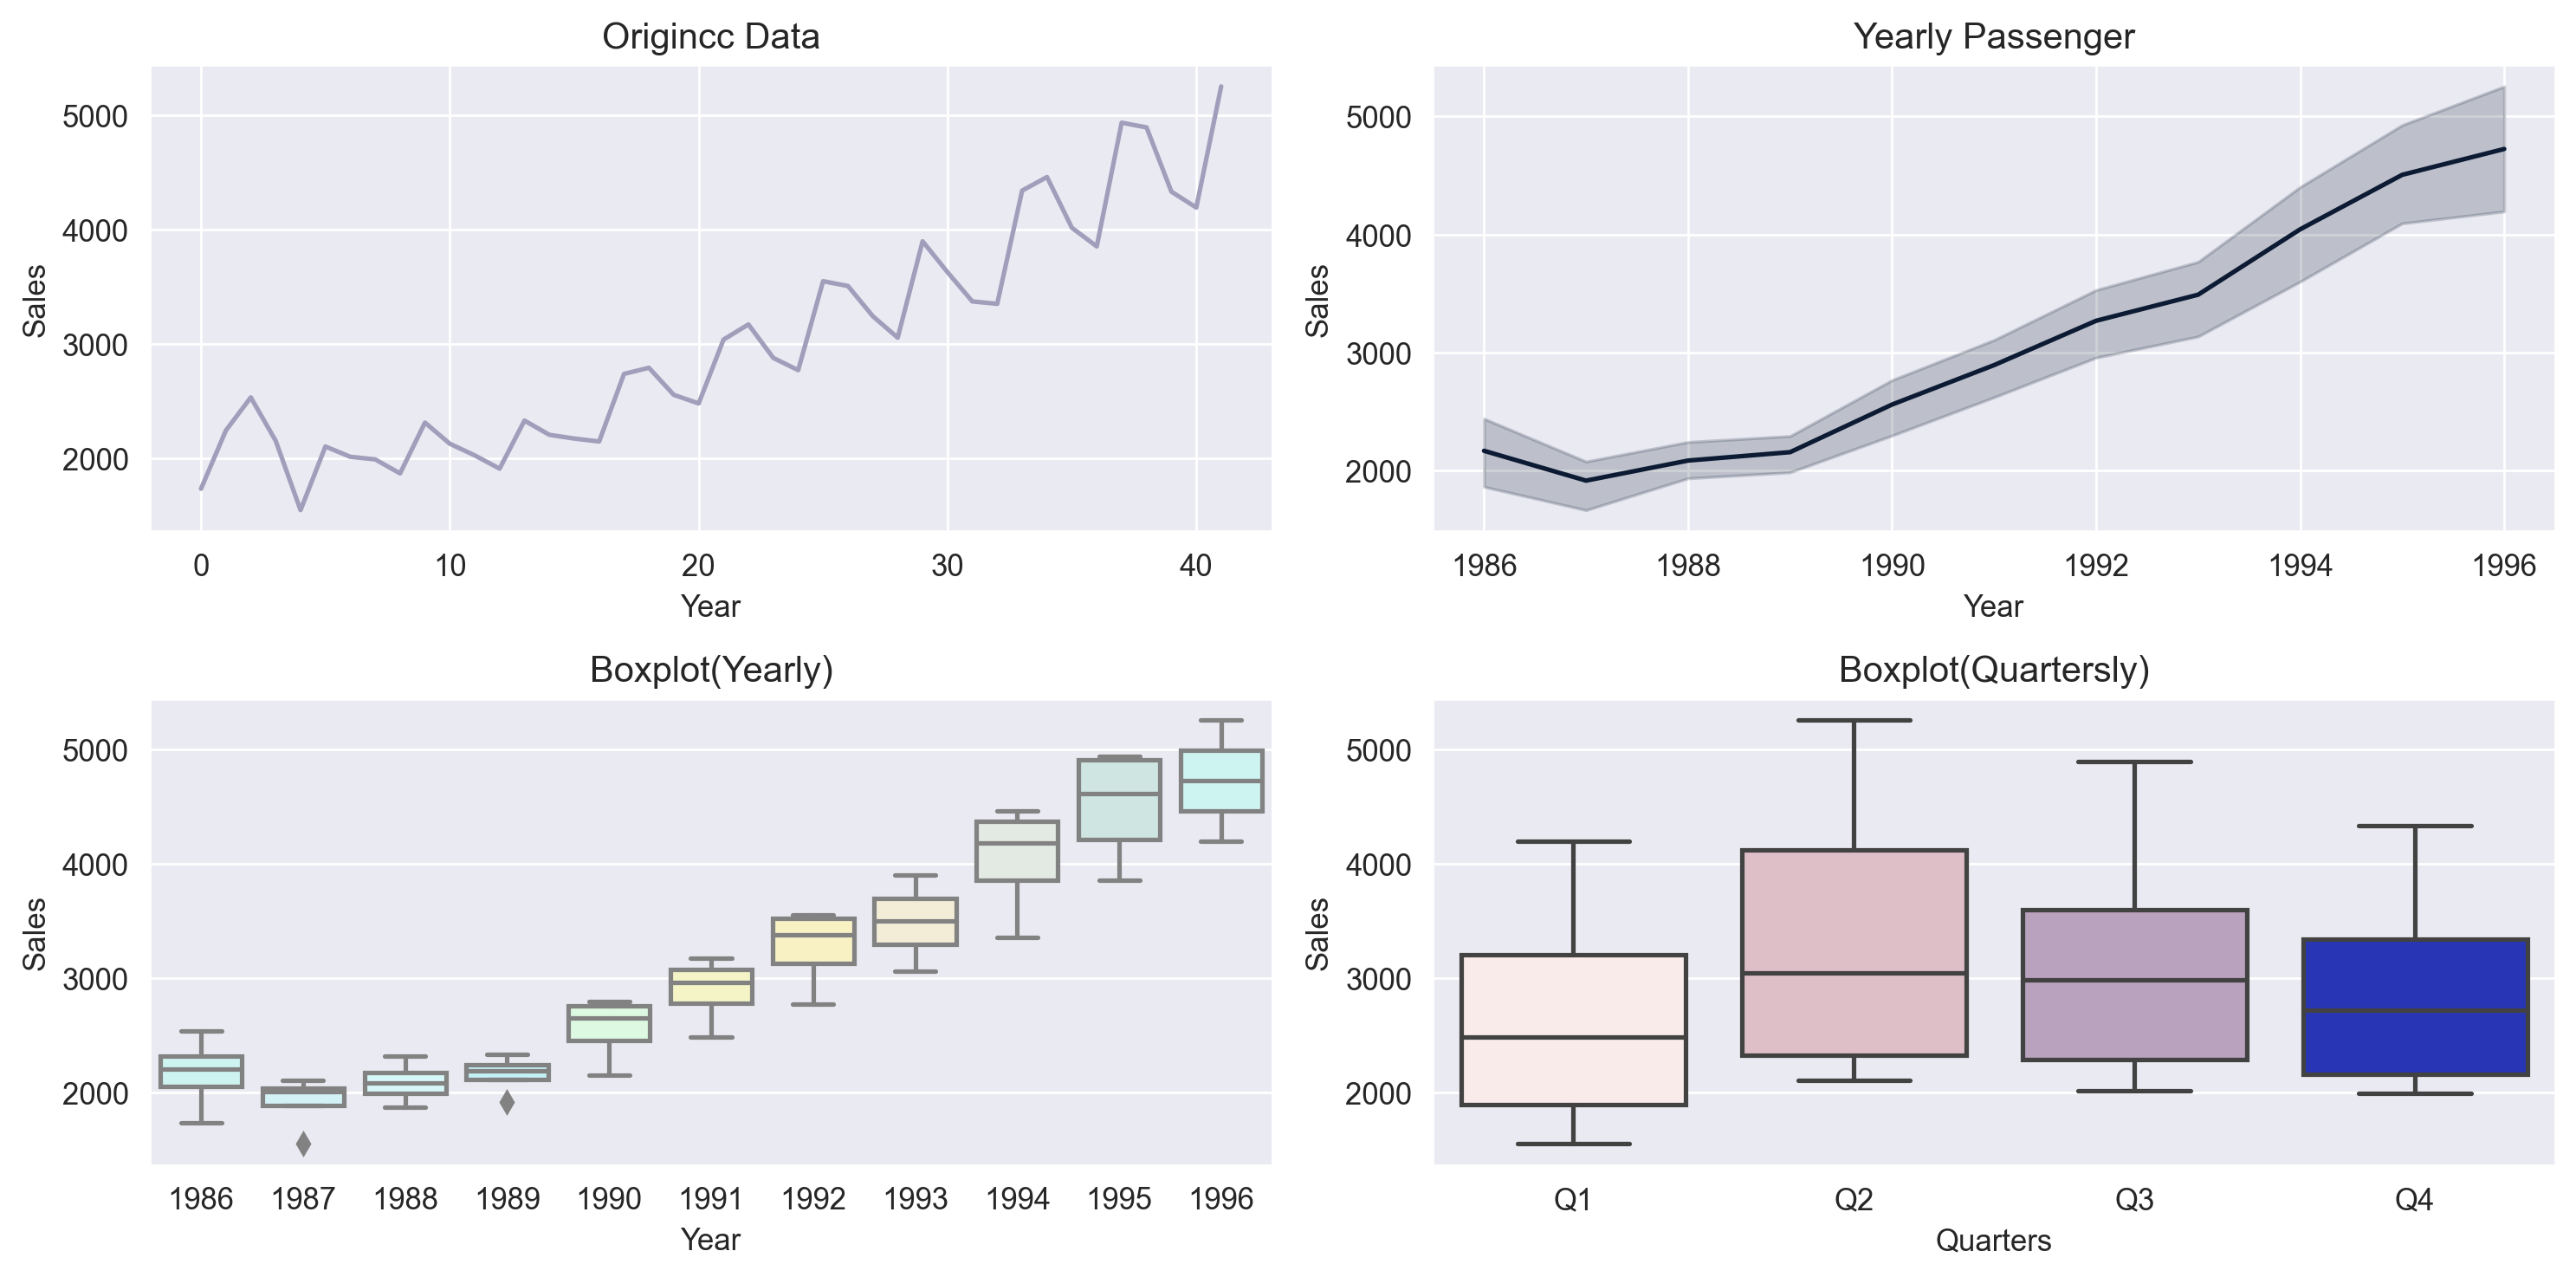

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

plt.setp(ax[0, 0], title = 'Origincc Data')
plt.setp(ax[0, 0], xlabel='Year')
sns.lineplot(cc['Sales'], ax = ax[0, 0], color = '#a09ebb')

plt.setp(ax[0, 1], title = 'Yearly Passenger')
sns.lineplot(x=cc['Year'],y=cc['Sales'], ax = ax[0, 1] , color = "#0c1b33")

ax[1, 0].title.set_text('Boxplot(Yearly)')
sns.boxplot(x = 'Year', y = 'Sales', data = cc, ax = ax[1, 0], palette = ['#c6fbf6', '#cdf7fb', '#d0fcfd', '#bbf9ff', '#d8fede', '#fbfcbf', '#fff8bc', '#f7efd4', '#e1ebe2', '#cae9e4'] )

ax[1, 1].title.set_text('Boxplot(Quartersly)')
sns.boxplot(x = 'Quarters', y = 'Sales', data = cc, ax = ax[1, 1], palette = ['#fde8e9', '#e3bac6', '#bc9ec1', '#1122cc'])

plt.tight_layout()

#### Using Subplots For Distplot And Heatmap

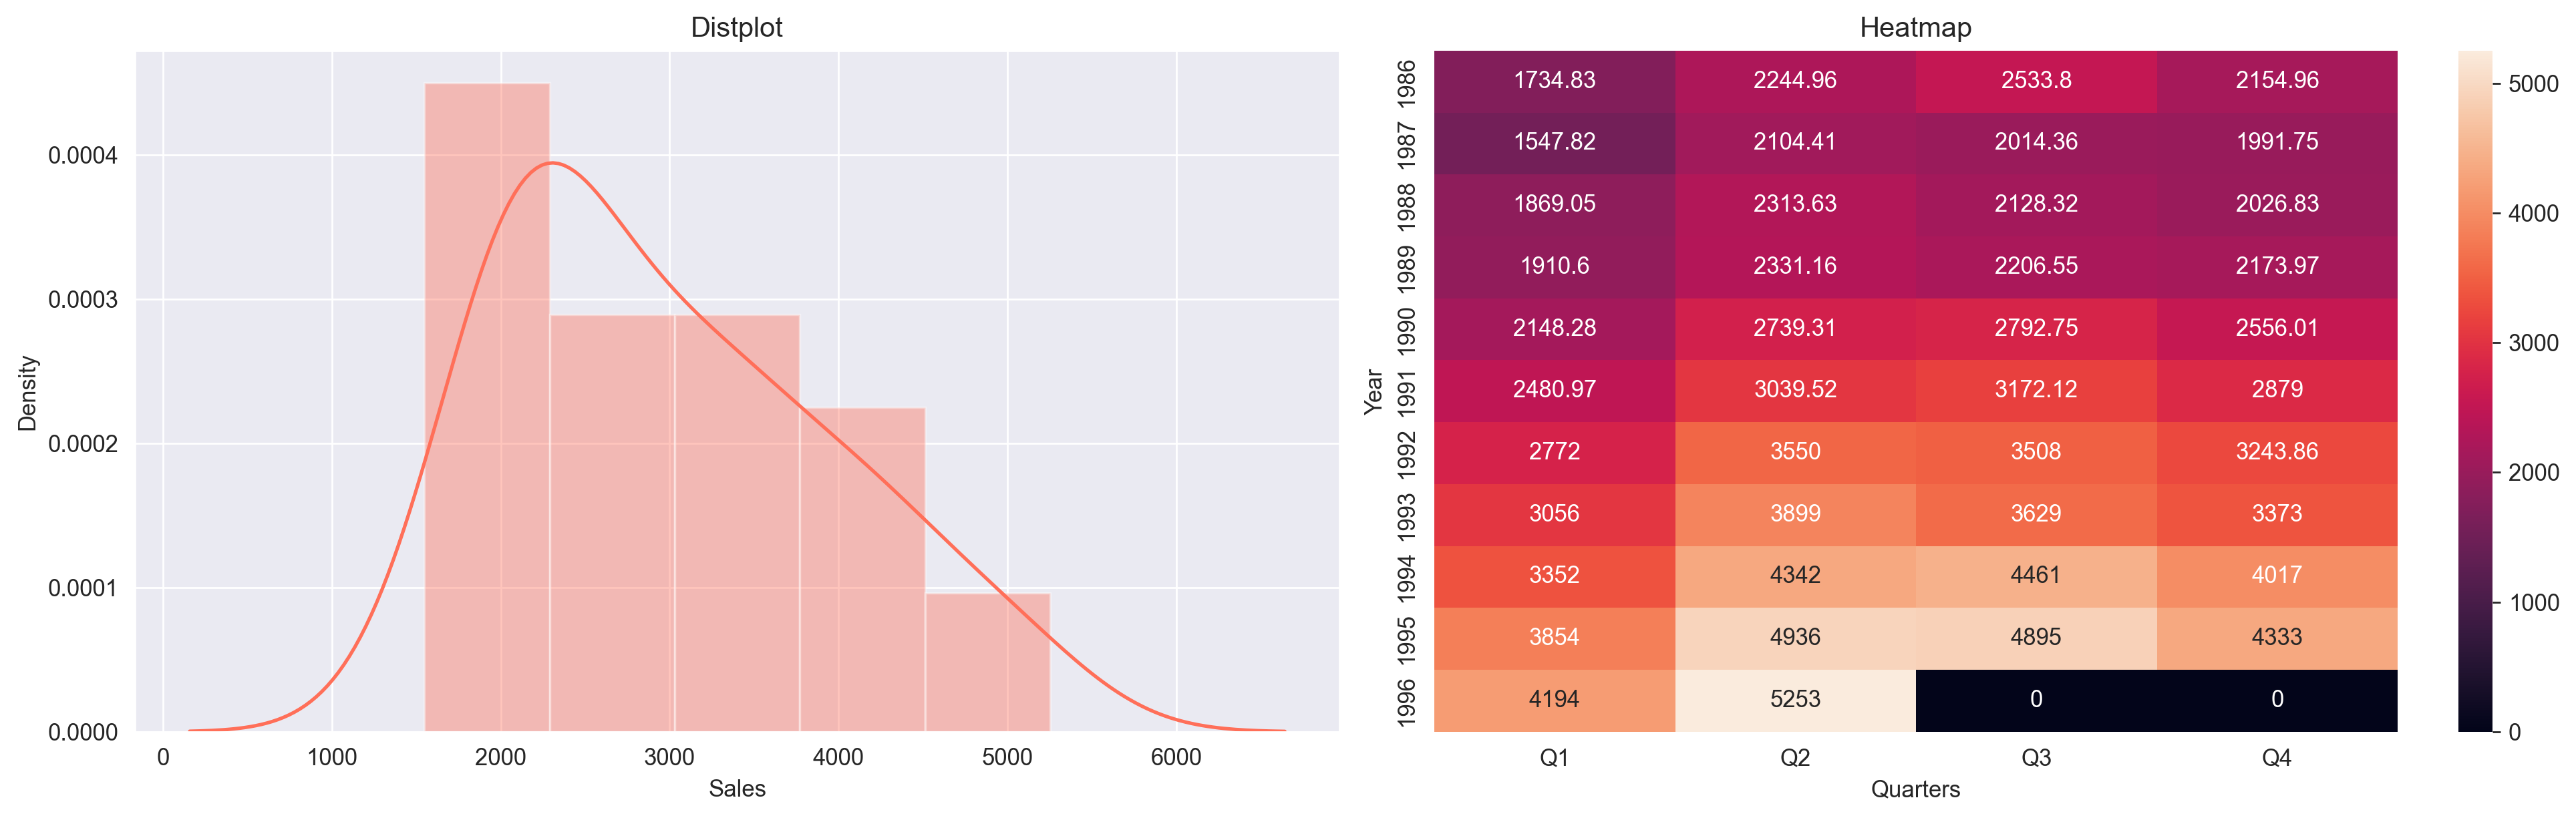

In [14]:
fig, ax = plt.subplots(ncols = 2, figsize=(16, 5))

ax[0].title.set_text('Distplot')
sns.distplot(cc['Sales'], color = '#ff6f59', ax=ax[0])

ax[1].title.set_text('Heatmap')
sns.heatmap(hm_y_m, annot = True, fmt="g", ax = ax[1])

plt.tight_layout()

### Preparing Lag-Plot

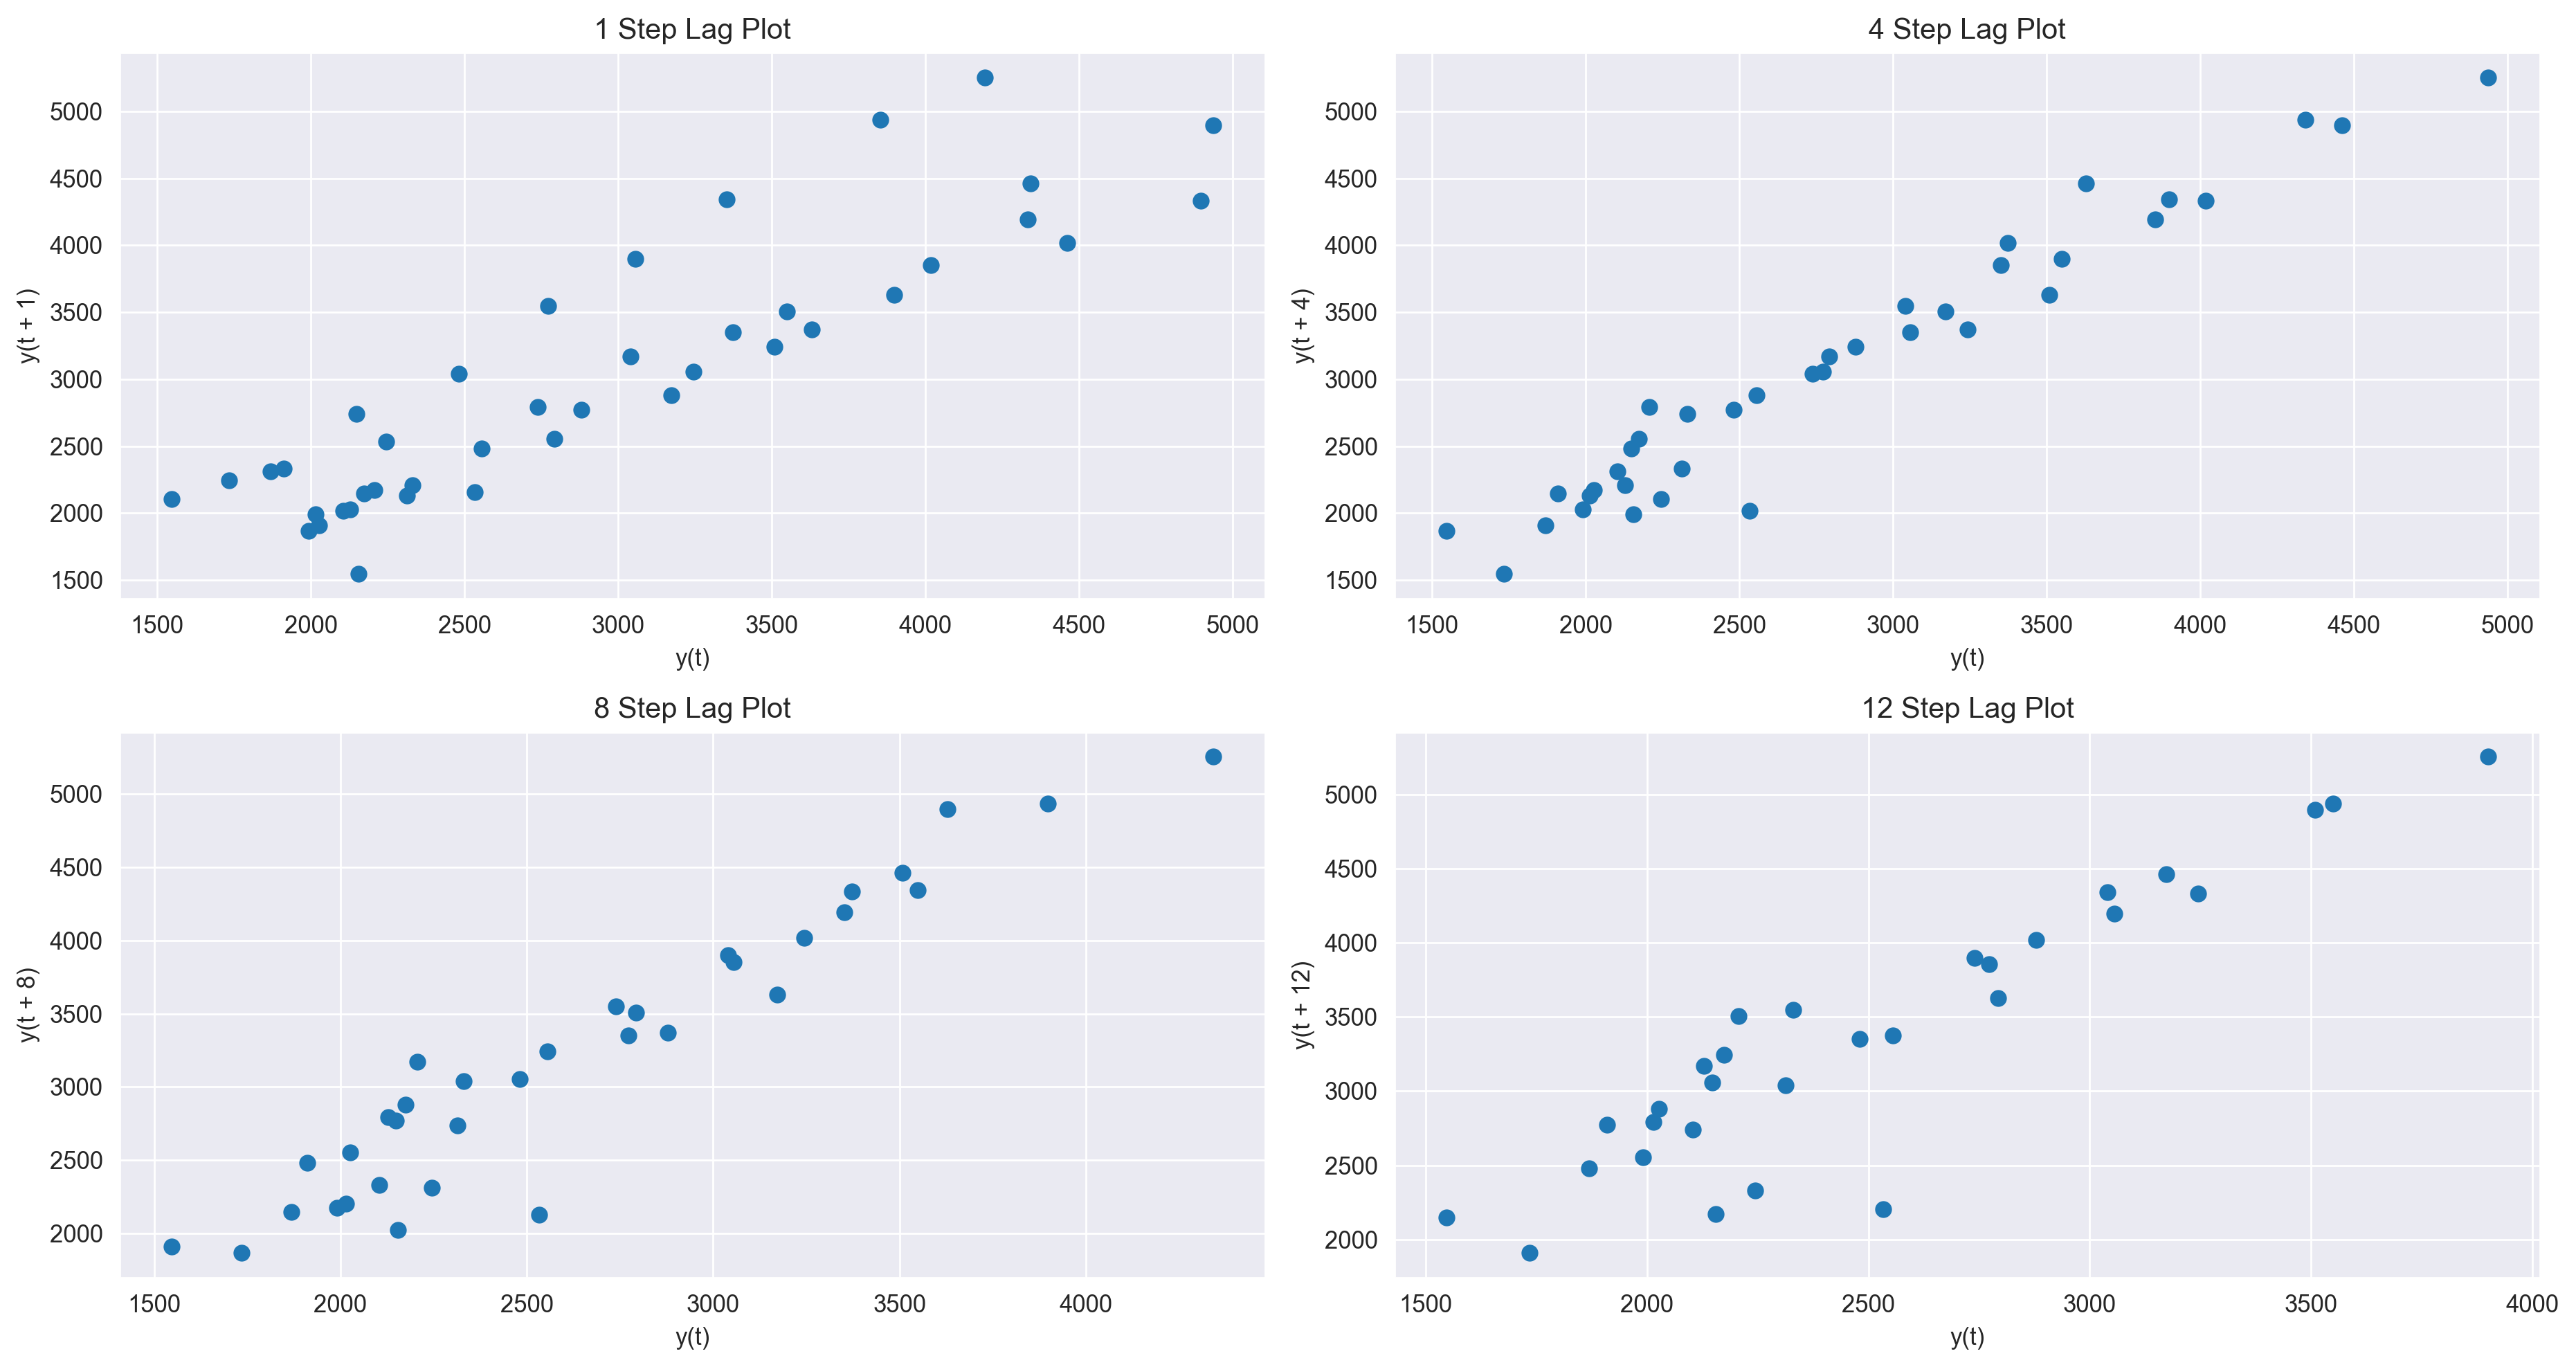

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))

plt.setp(ax[0, 0], title ='1 Step Lag Plot')
lag_plot(cc.Sales, lag=1, ax = ax[0, 0])

plt.setp(ax[0, 1], title ='4 Step Lag Plot')
lag_plot(cc.Sales, lag=4, ax = ax[0, 1])

plt.setp(ax[1, 0], title ='8 Step Lag Plot')
lag_plot(cc.Sales, lag=8, ax = ax[1, 0])

plt.setp(ax[1, 1], title ='12 Step Lag Plot')
lag_plot(cc.Sales, lag=12, ax = ax[1, 1])

plt.tight_layout()

### Converting Categoriccc Data To Numericcc Data

#### Converting Independent Column Using Get Dummies

In [16]:
cc = pd.get_dummies(cc, columns = ['Quarters'])

cc.rename(columns = {   'Quarters_Q1':'Q1',
                        'Quarters_Q2':'Q2',
                        'Quarters_Q3':'Q3',
                        'Quarters_Q4':'Q4',}, inplace = True)

cc.head()

,Quarter,Sales,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1986,1,0,0,0
1,Q2_86,2244.960999,1986,0,1,0,0
2,Q3_86,2533.804993,1986,0,0,1,0
3,Q4_86,2154.962997,1986,0,0,0,1
4,Q1_87,1547.818996,1987,1,0,0,0


### Performing Squared and Log Transformation

In [17]:
cc['t'] = np.arange(1,cc.shape[0]+1)
cc['squared_t'] = cc['t']*cc['t']

cc['log_Sales'] = np.log(cc['Sales'])
cc['sqrt_Sales'] = np.sqrt(cc['Sales'])

cc.head()

,Quarter,Sales,Year,Q1,Q2,Q3,Q4,t,squared_t,log_Sales,sqrt_Sales
0,Q1_86,1734.827000,1986,1,0,0,0,1,1,7.458663,41.651254
1,Q2_86,2244.960999,1986,0,1,0,0,2,4,7.716443,47.381019
2,Q3_86,2533.804993,1986,0,0,1,0,3,9,7.837477,50.336915
3,Q4_86,2154.962997,1986,0,0,0,1,4,16,7.675529,46.421579
4,Q1_87,1547.818996,1987,1,0,0,0,5,25,7.344602,39.342331


#### Comparing Origincc, Log And Sqrt Data With Line-Plot

<Axes: title={'center': 'Sqrt Data'}, ylabel='sqrt_Sales'>

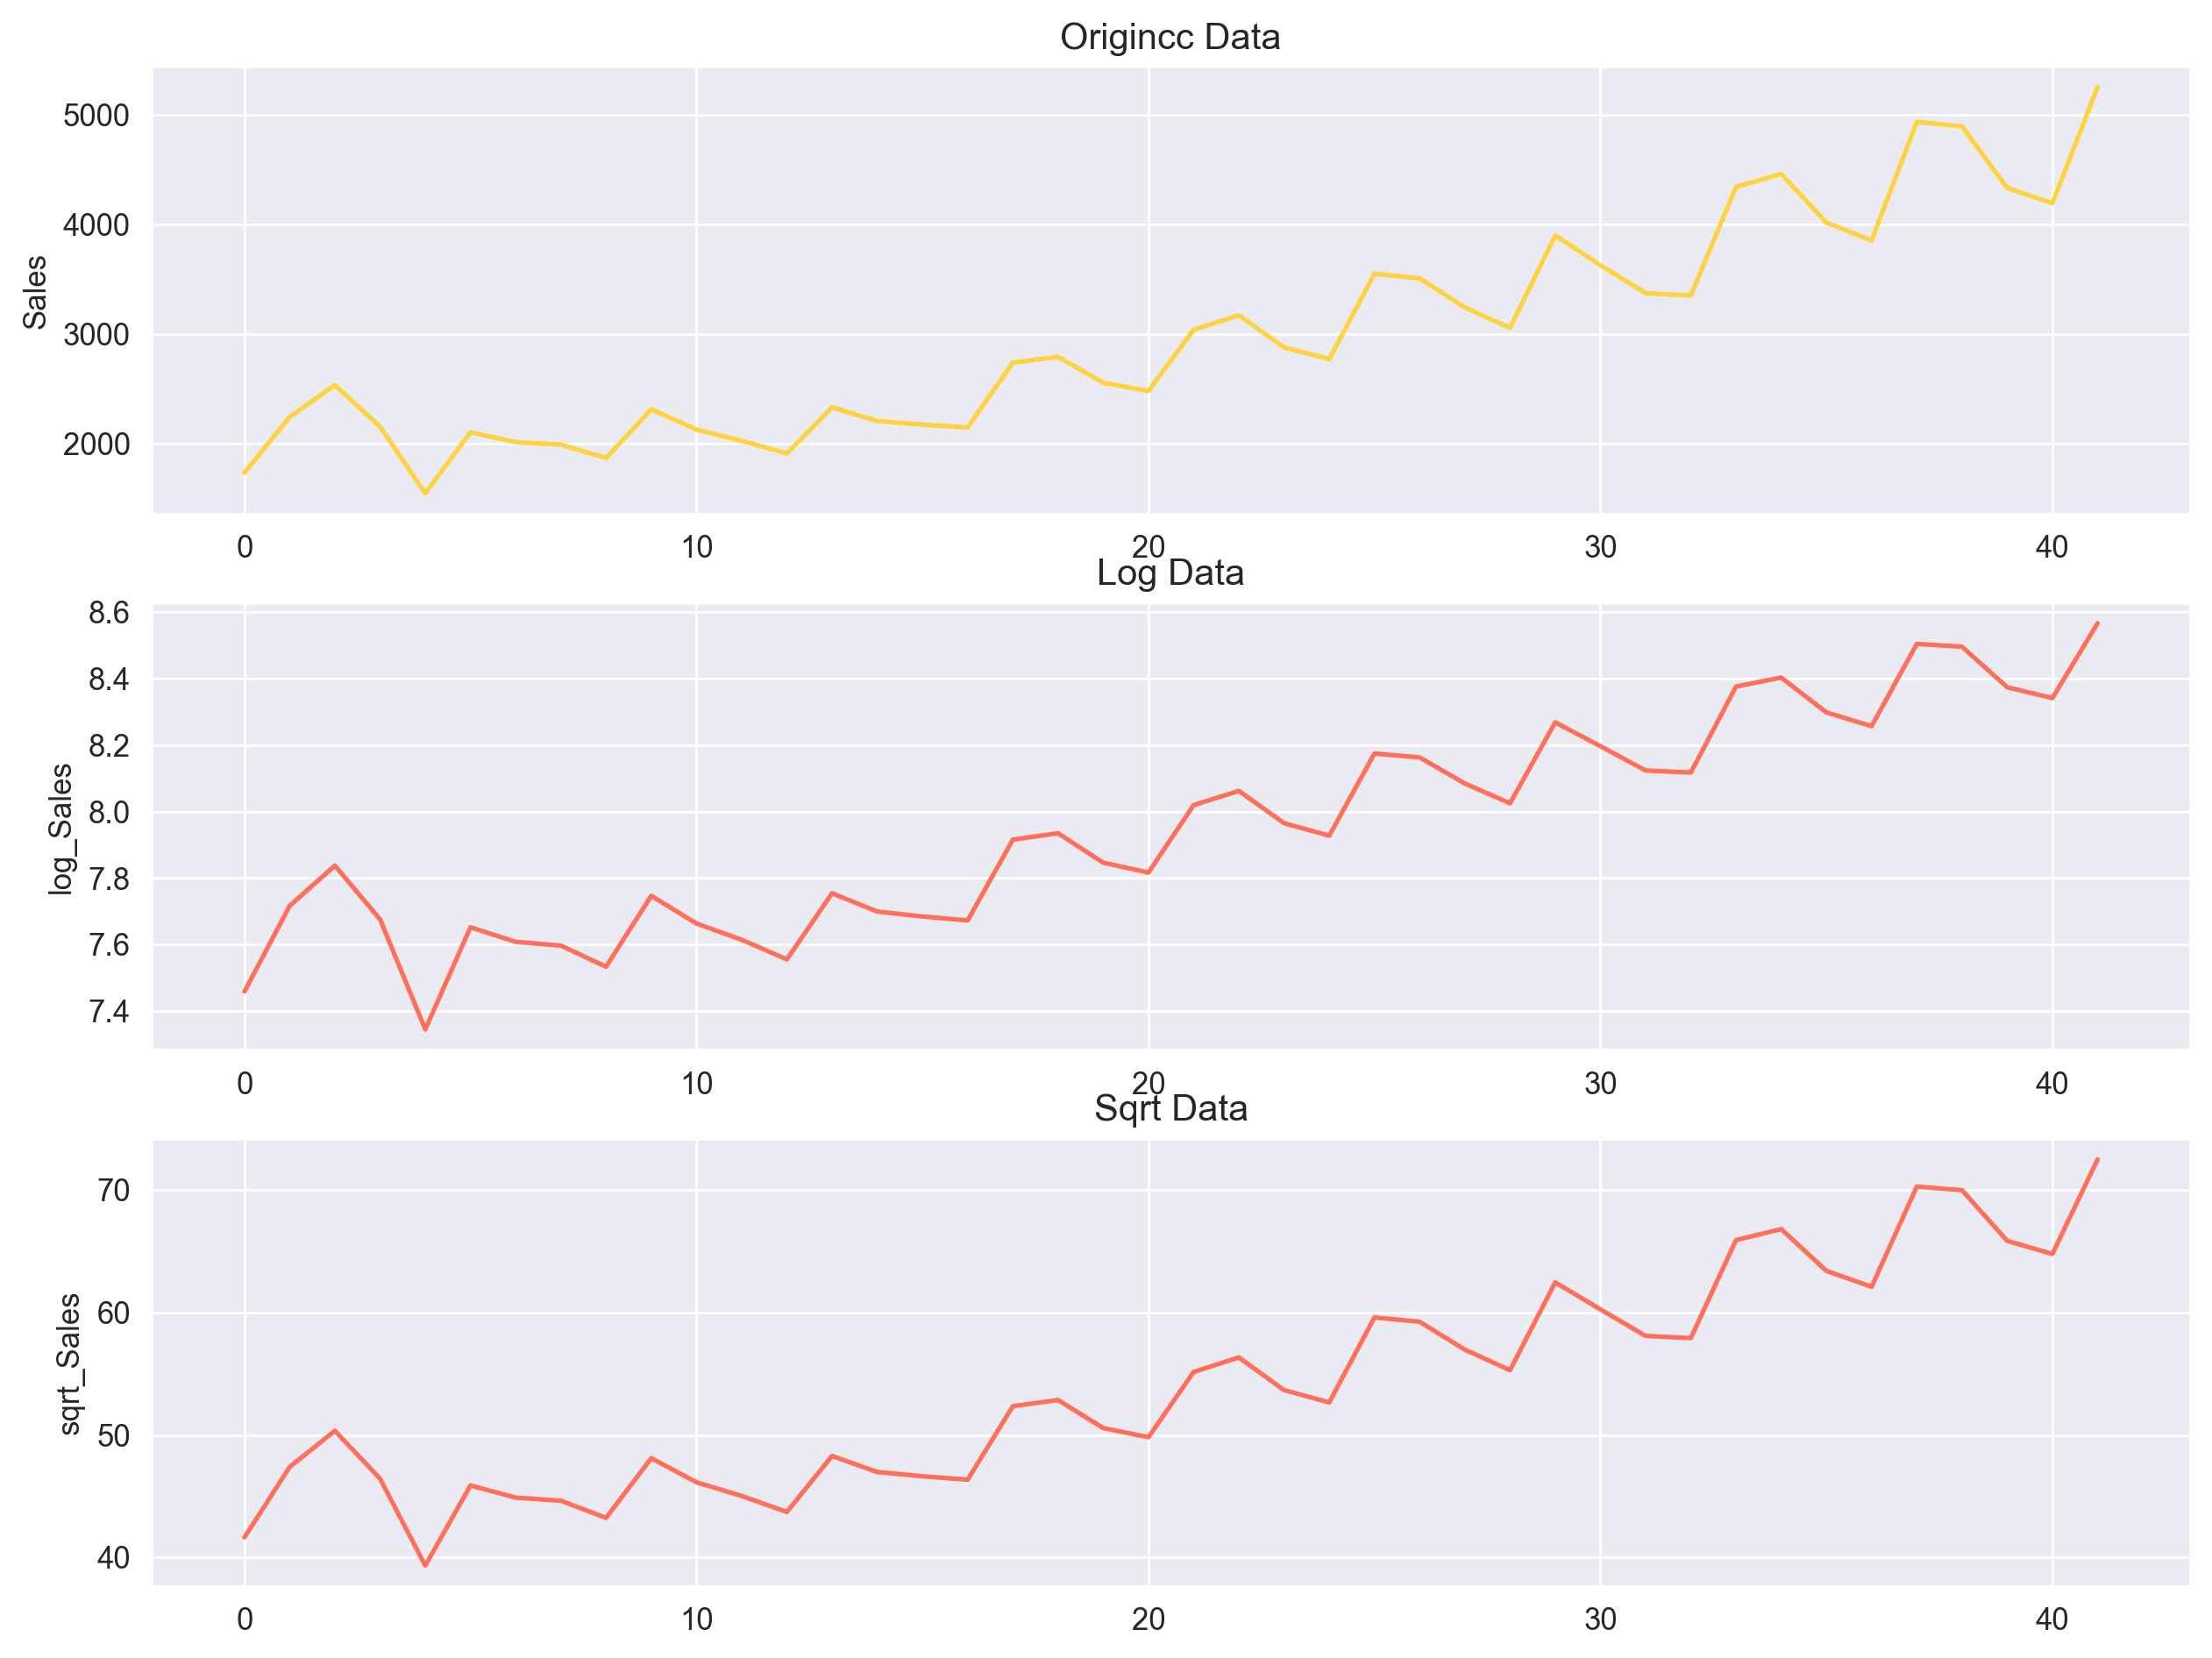

In [18]:
fig, ax = plt.subplots(nrows = 3, figsize=(12, 9))

plt.setp(ax[0], title = 'Origincc Data')
sns.lineplot(cc['Sales'], color = '#ffd23f', ax = ax[0])

plt.setp(ax[1], title = 'Log Data')
sns.lineplot(cc['log_Sales'], color = '#ff6f59', ax = ax[1])

plt.setp(ax[2], title = 'Sqrt Data')
sns.lineplot(cc['sqrt_Sales'], color = '#ff6f59', ax = ax[2])

#### Comparing Origincc, Log And Sqrt Data With Dist-Plot

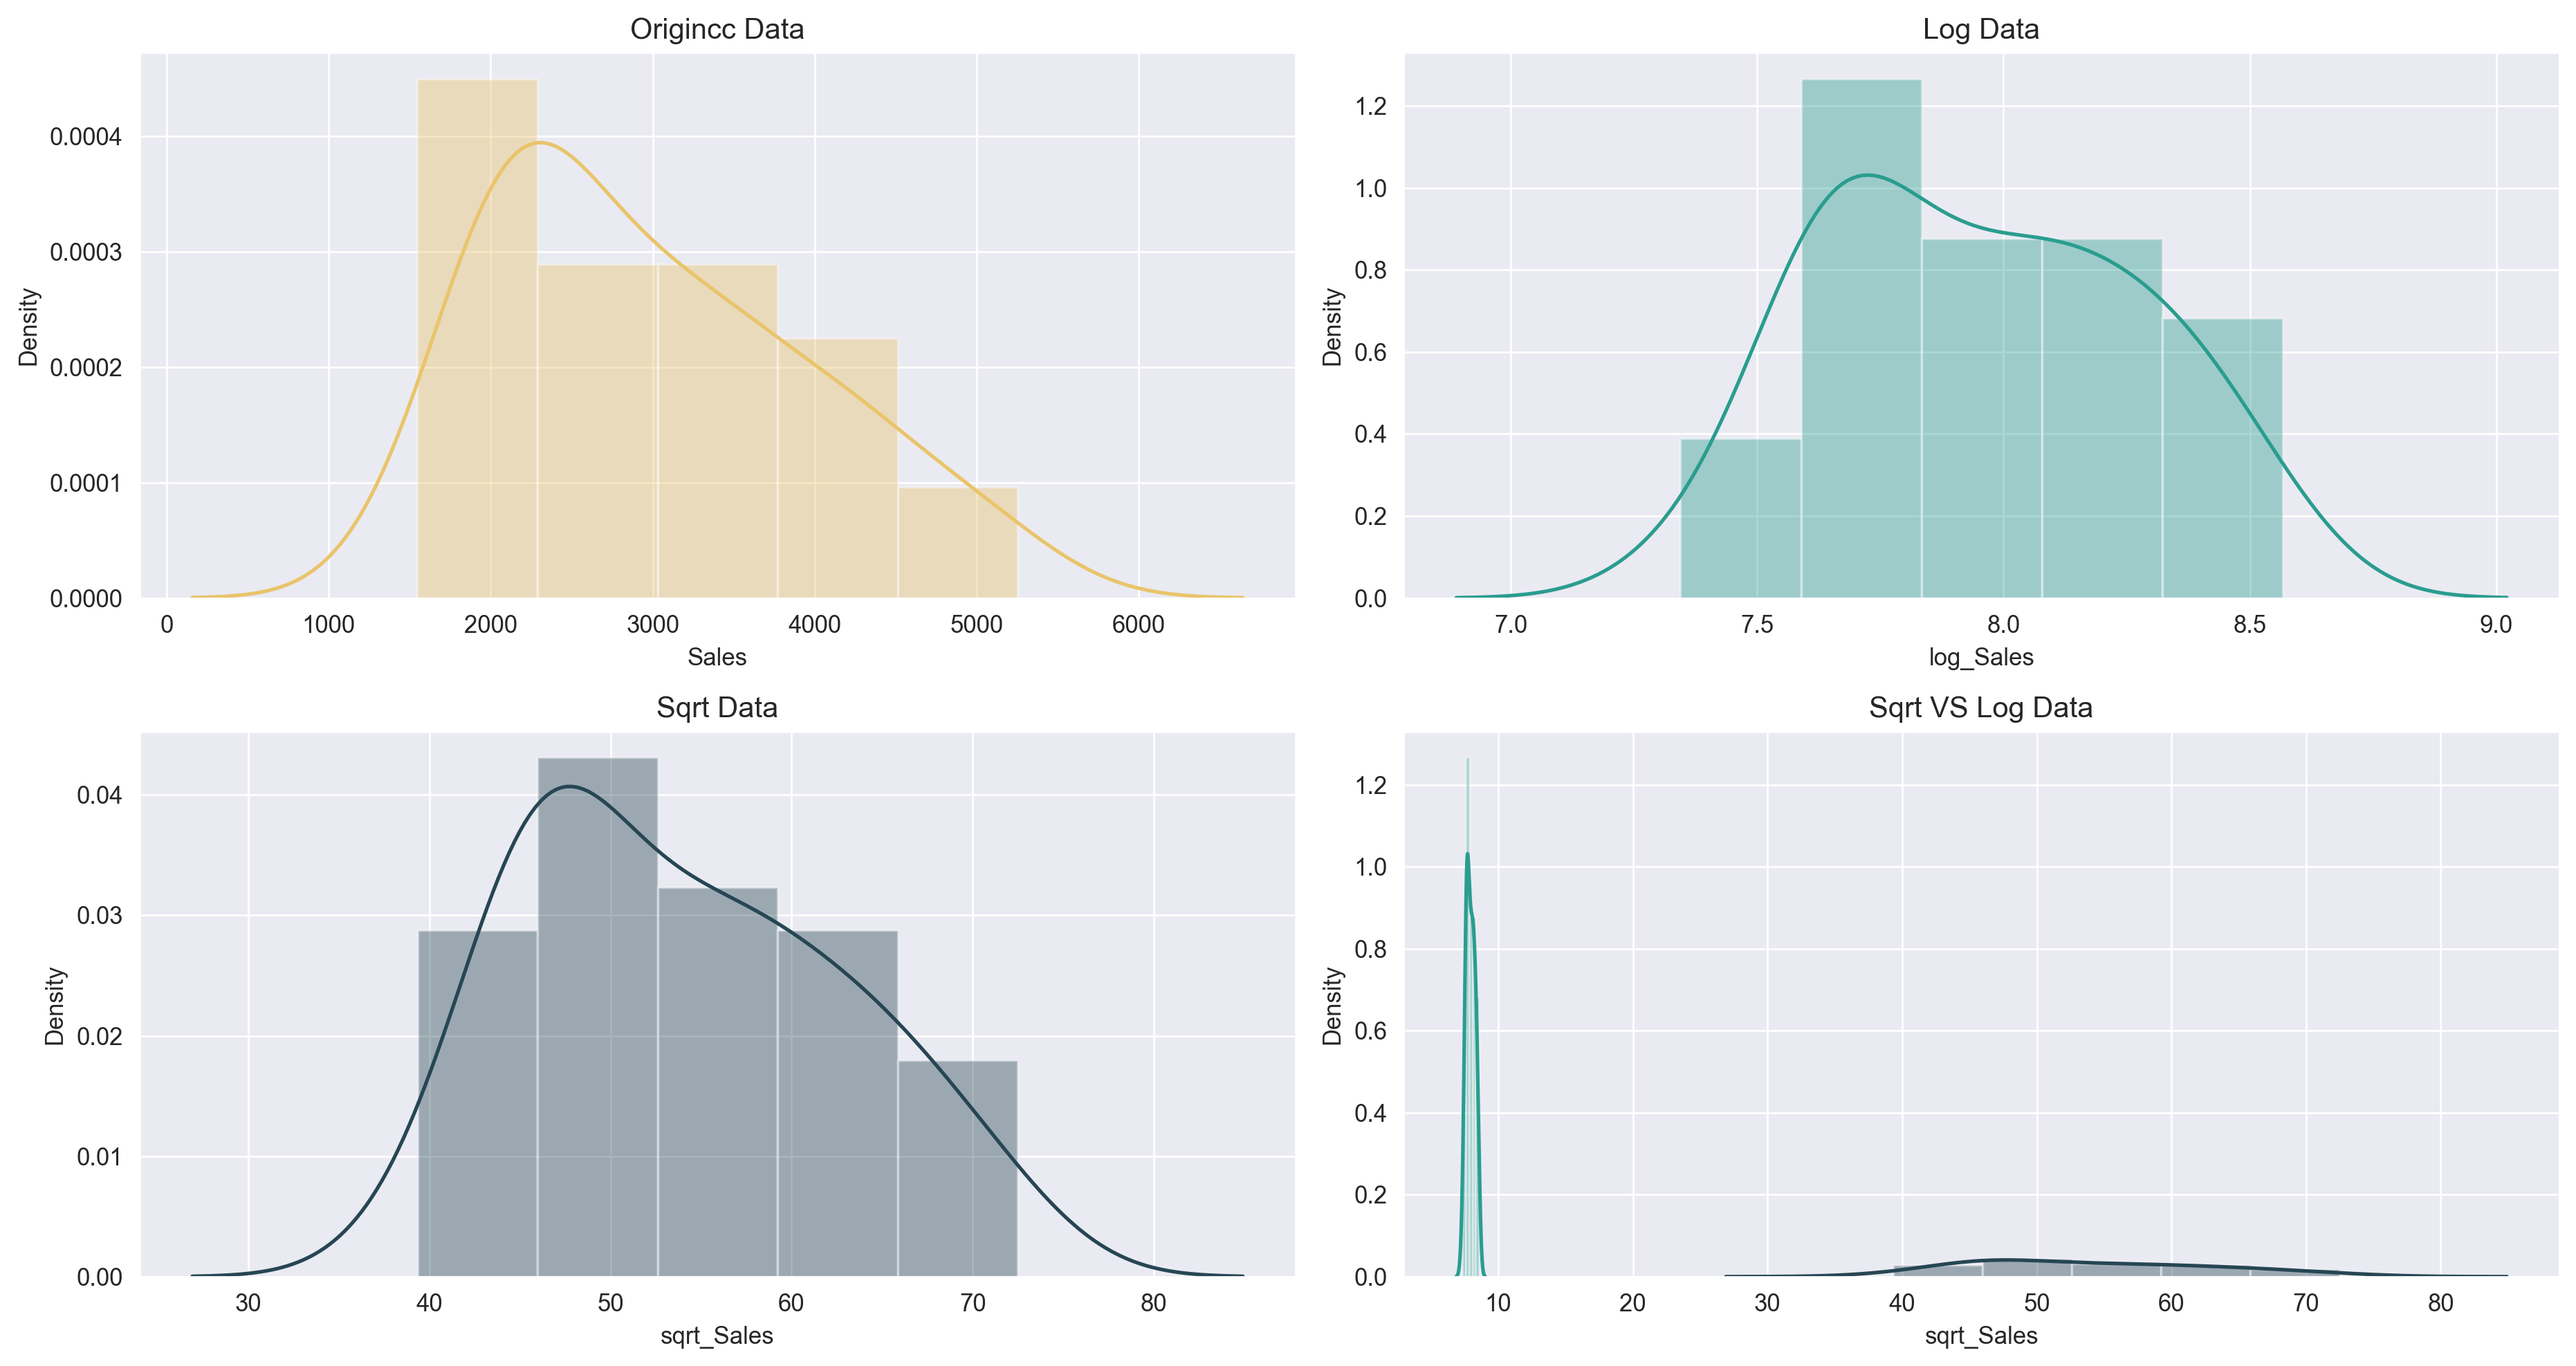

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

plt.setp(ax[0, 0], title = 'Origincc Data')
sns.distplot(cc['Sales'], color = '#e9c46a', ax = ax[0, 0])

plt.setp(ax[0, 1], title = 'Log Data')
sns.distplot(cc['log_Sales'], color = '#2a9d8f', ax = ax[0, 1])

plt.setp(ax[1, 0], title = 'Sqrt Data')
sns.distplot(cc['sqrt_Sales'], color = '#264653', ax = ax[1, 0])

plt.setp(ax[1, 1], title = 'Sqrt VS Log Data')
sns.distplot(cc['log_Sales'], color = '#2a9d8f', ax = ax[1, 1])
sns.distplot(cc['sqrt_Sales'], color = '#264653', ax = ax[1, 1])


plt.tight_layout()

## Preparing Moving Average

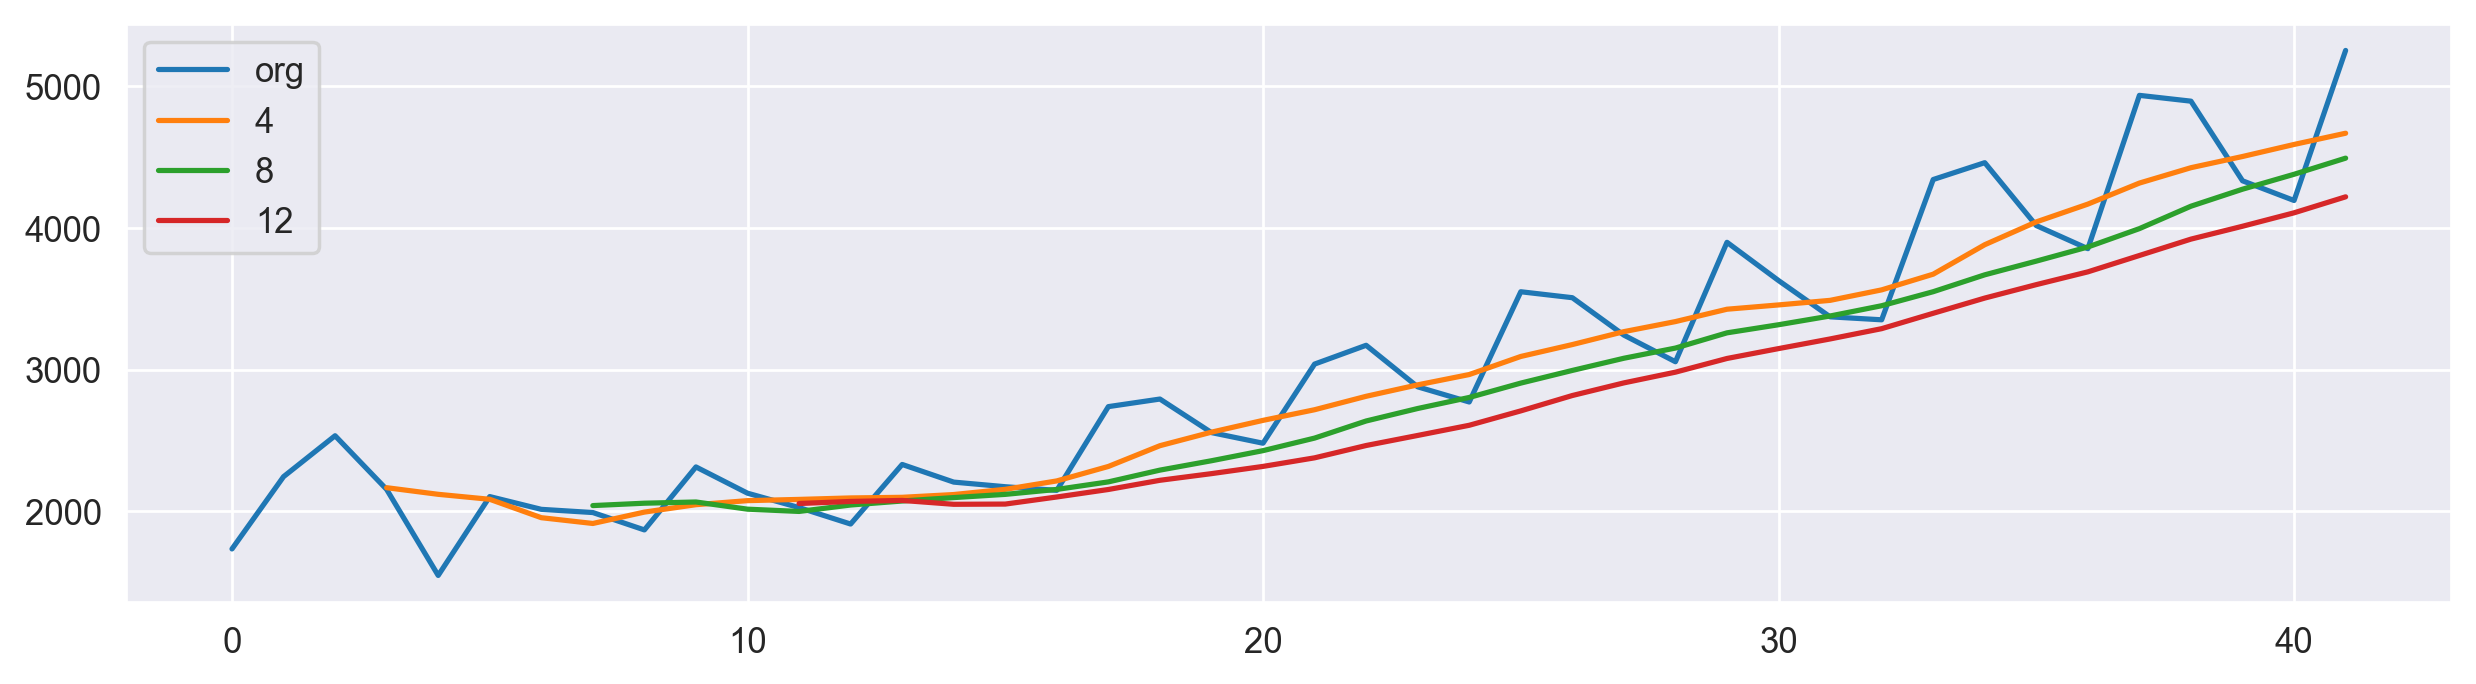

In [20]:
cc.Sales.plot(label="org")
for i in range(4,13,4):
    cc["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

## Performing First-Order Difference

In [21]:
fo = cc[['Quarter', 'Sales']]
fo.set_index('Quarter', inplace = True)

fo['First-Order'] = fo['Sales'].diff(periods = 1)

fo.dropna(inplace=True)

fo.head()

,Sales,First-Order
Quarter,,
Q2_86,2244.960999,510.133999
Q3_86,2533.804993,288.843994
Q4_86,2154.962997,-378.841995
Q1_87,1547.818996,-607.144001
Q2_87,2104.411995,556.592999


#### Ploting Origincc Data VS First Order Graph

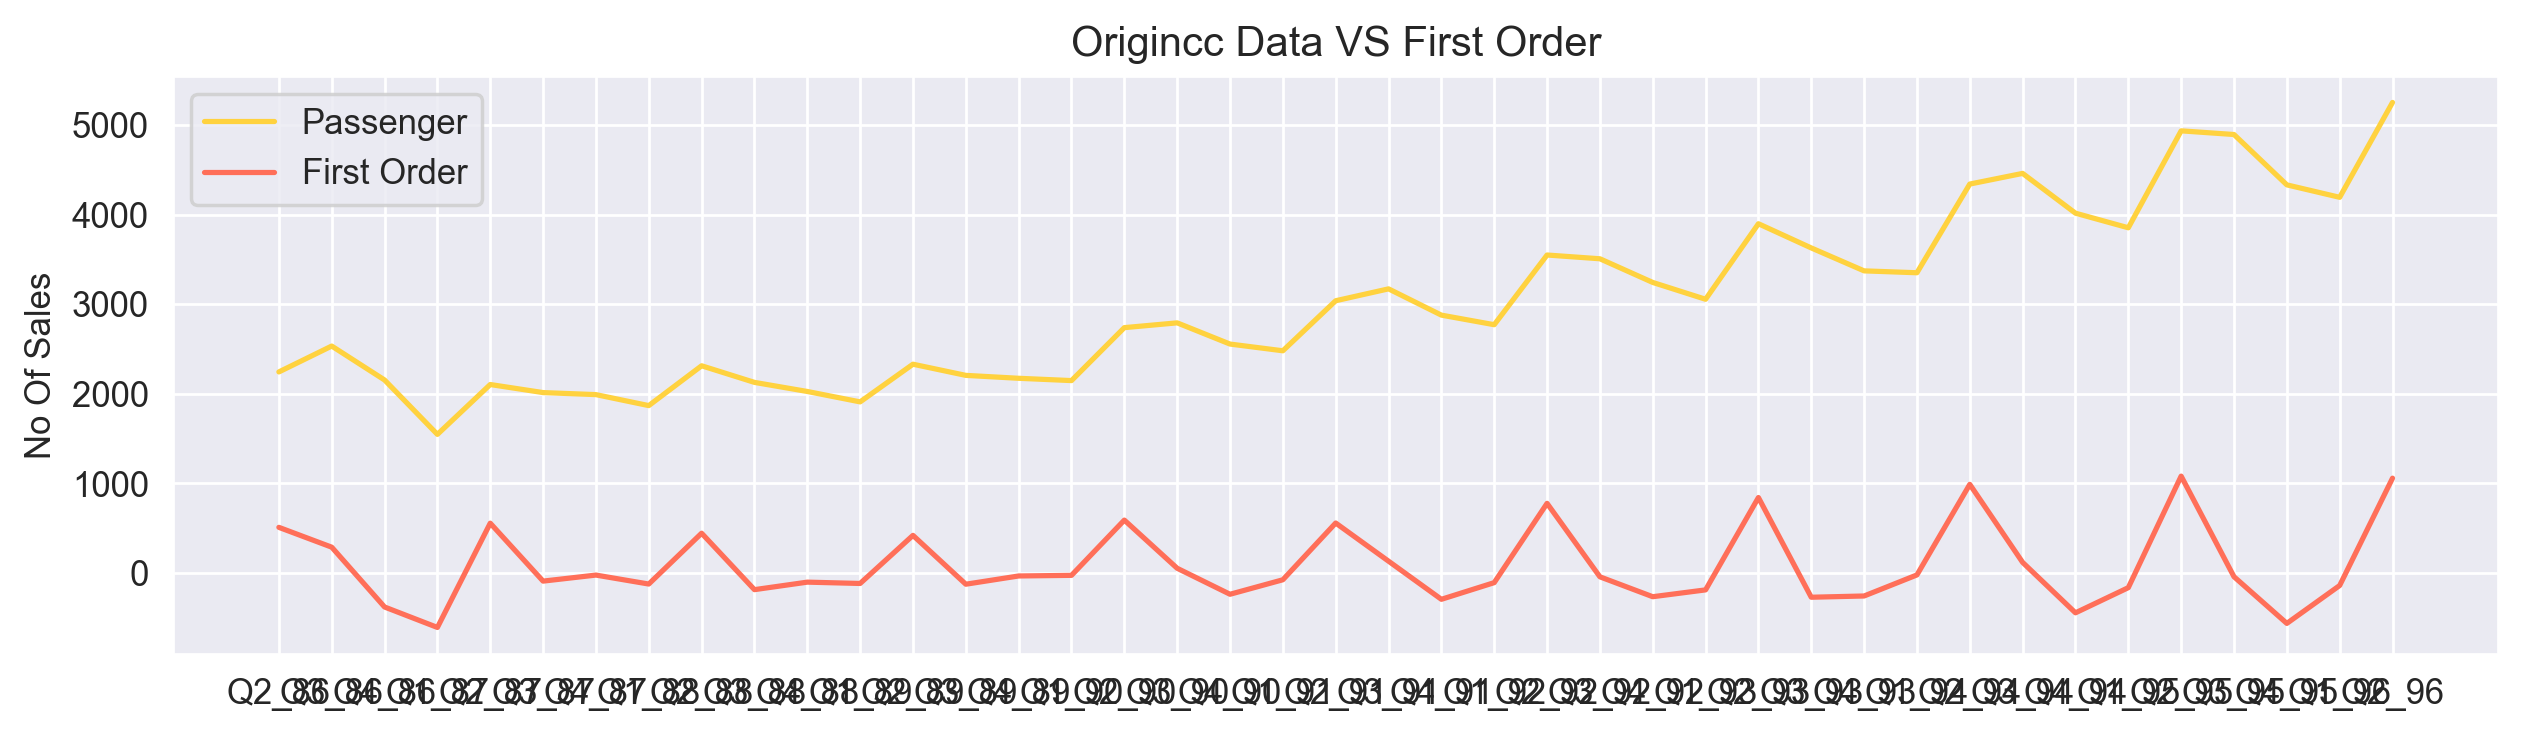

In [22]:
plt.title('Origincc Data VS First Order')
plt.ylabel('No Of Sales')
plt.plot(fo['Sales'], color = '#ffd23f', label = 'Passenger')
plt.plot(fo['First-Order'], color = '#ff6f59', label = 'First Order')
plt.legend()

#### Ploting Autocorrelation And Particc Autocorrelation Graph

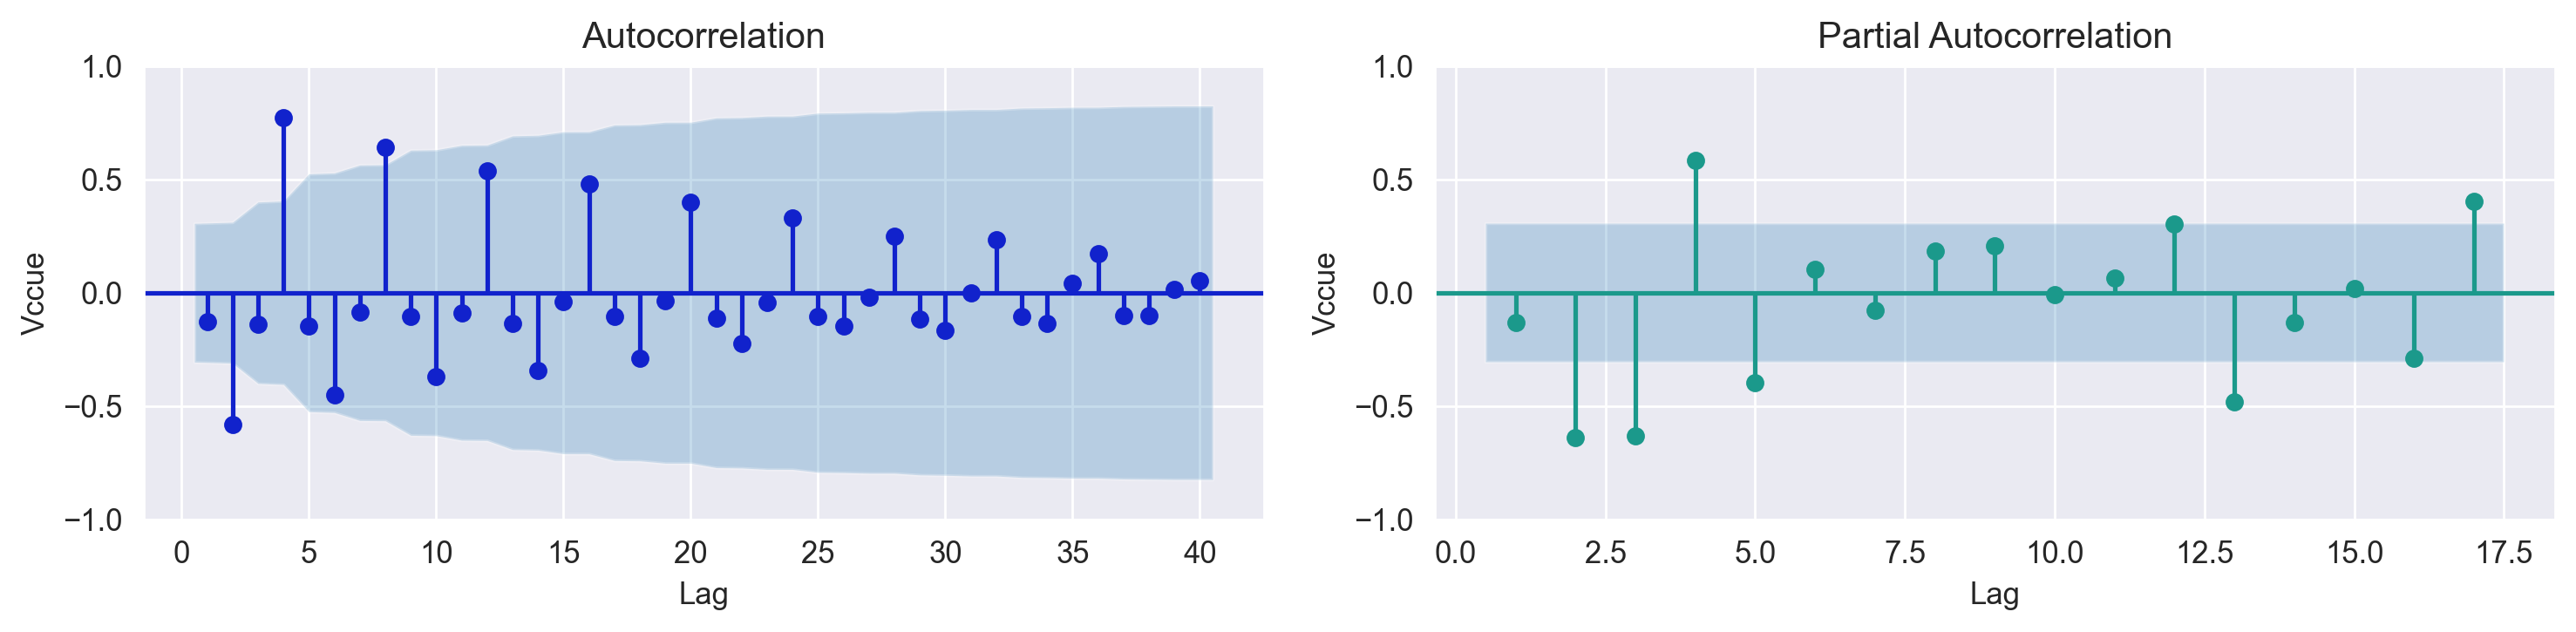

In [23]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], xlabel='Lag')
plt.setp(ax[0], ylabel='Vccue')
plot_acf(fo['First-Order'], lags=40, ax = ax[0], color='#1122cc', vlines_kwargs={"colors": '#1122cc'}, zero = False);

plt.setp(ax[1], xlabel='Lag')
plt.setp(ax[1], ylabel='Vccue')
plot_pacf(fo['First-Order'], ax = ax[1], color='#1b998b', vlines_kwargs={"colors": '#1b998b'}, zero = False);

plt.tight_layout()

## Splitting Data Into Training And Test

In [24]:
train = cc.head(32)
test = cc.tail(10)

### Ploting Training And Testing Data

<Axes: title={'center': 'Training VS Testing'}, ylabel='Sales'>

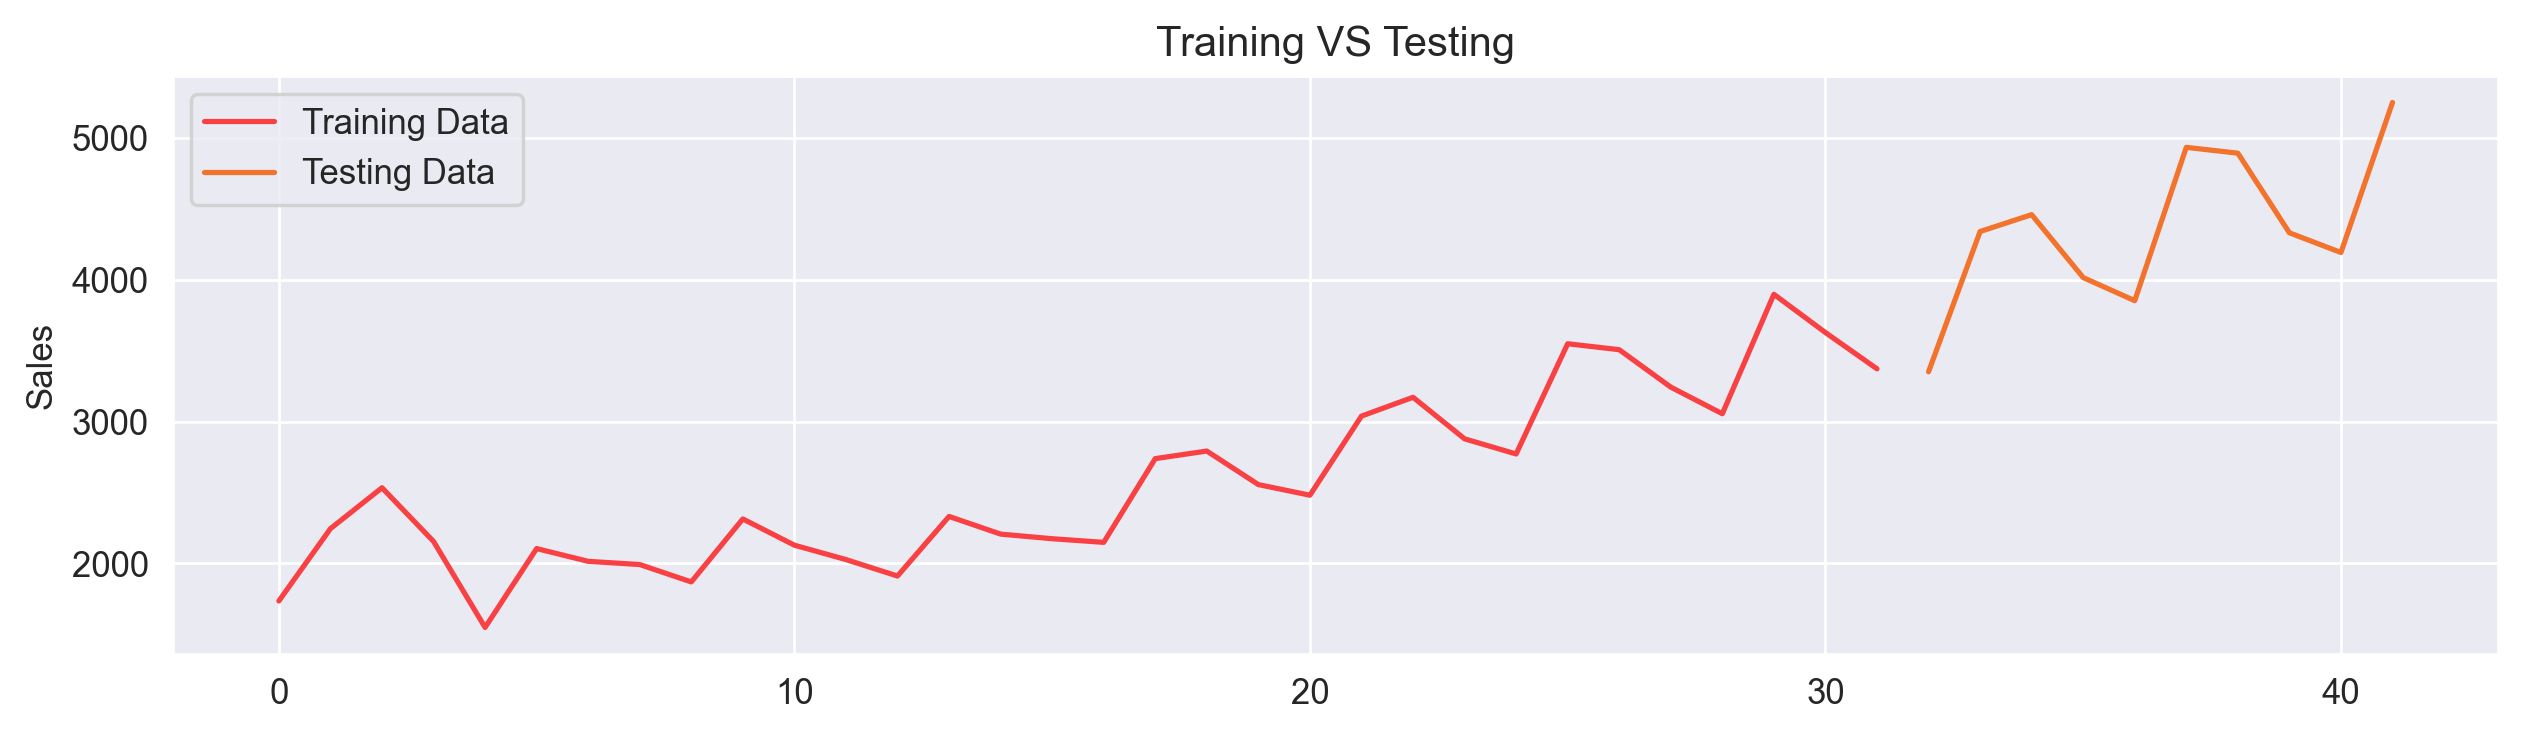

In [25]:
plt.title('Training VS Testing')
sns.lineplot(train['Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Sales'], color = '#f3722c', label = 'Testing Data')

## Preparing Model From The Dataset

### Creating Linear Model

In [26]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'], pred_linear))

#### Evccuating The Model

Text(0.5, 0, 'Linear Model RMSE Vccue : 752.9233932767121')

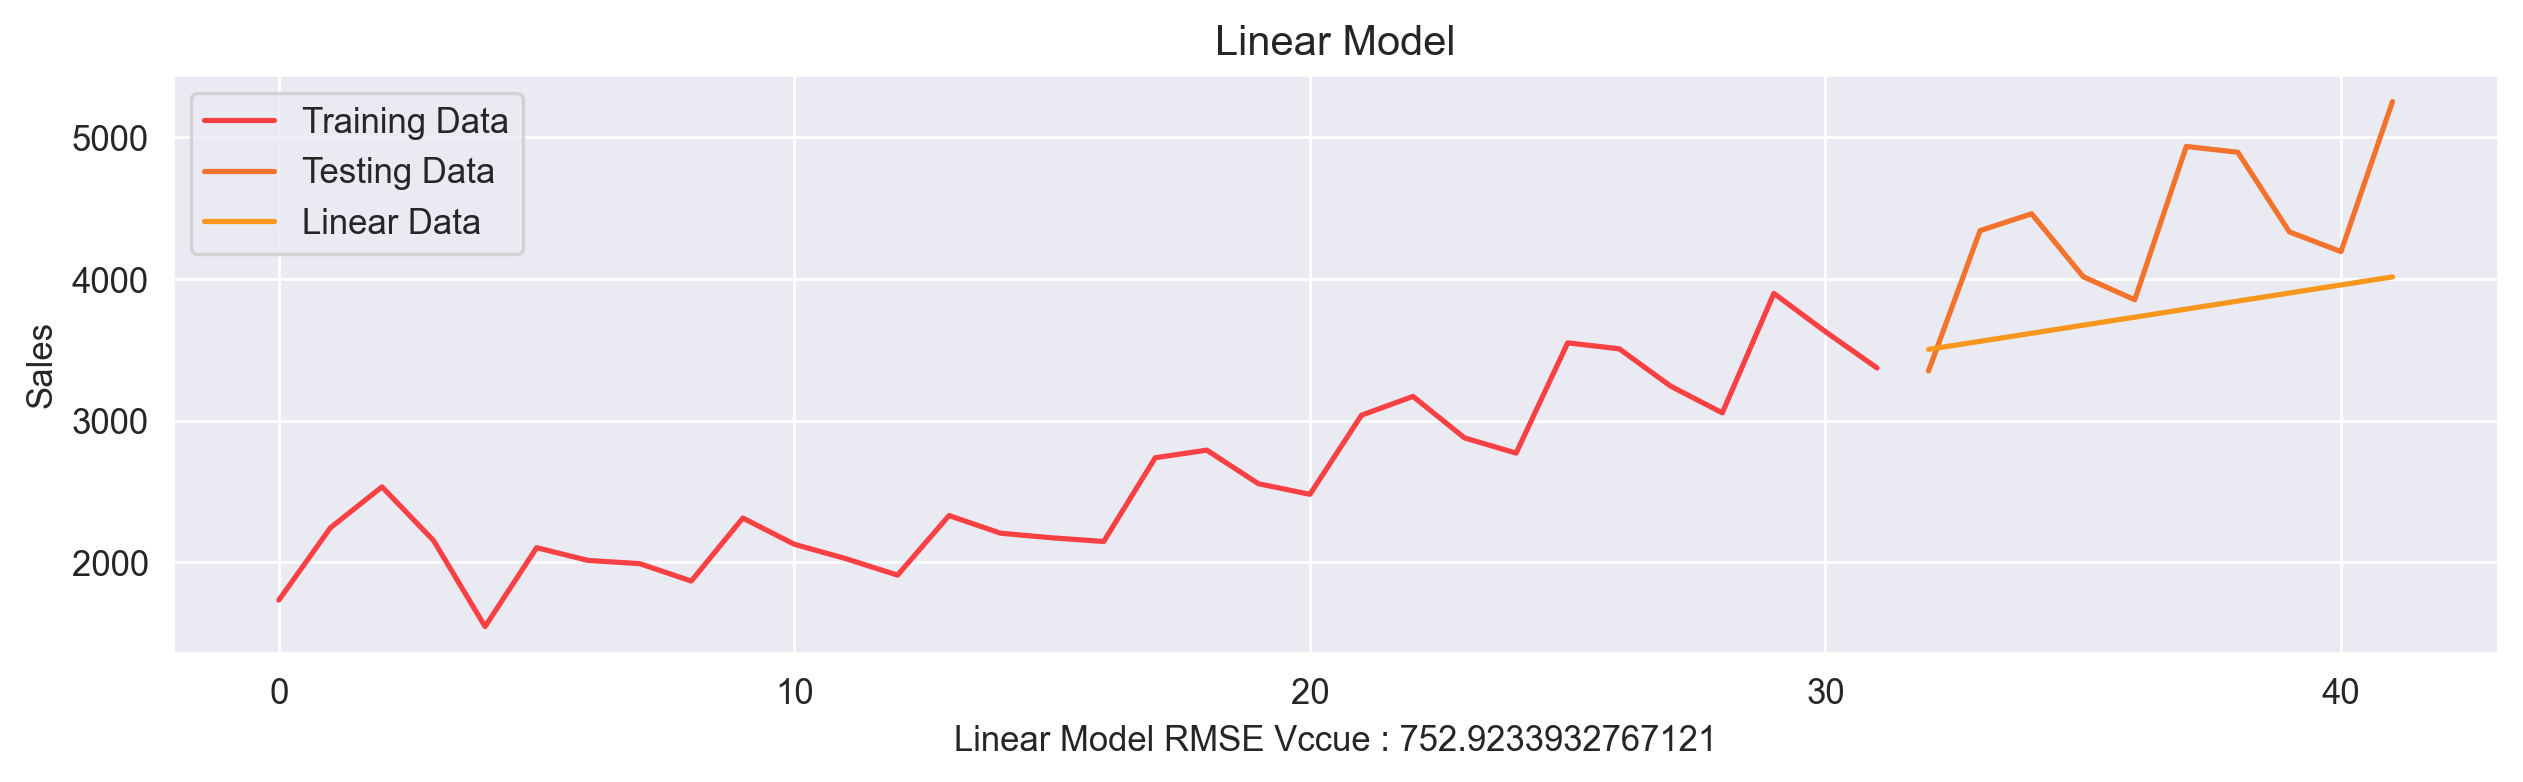

In [27]:
plt.title('Linear Model')
sns.lineplot(train['Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_linear, color = '#f8961e', label = 'Linear Data')
plt.xlabel('Linear Model RMSE Vccue : ' + str(rmse_linear))

### Creating Exponenticc Model

In [28]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Sales'], pred_linear))

#### Evccuating The Model

Text(0.5, 0, 'Exponenticc Model RMSE Vccue : 752.9233932767121')

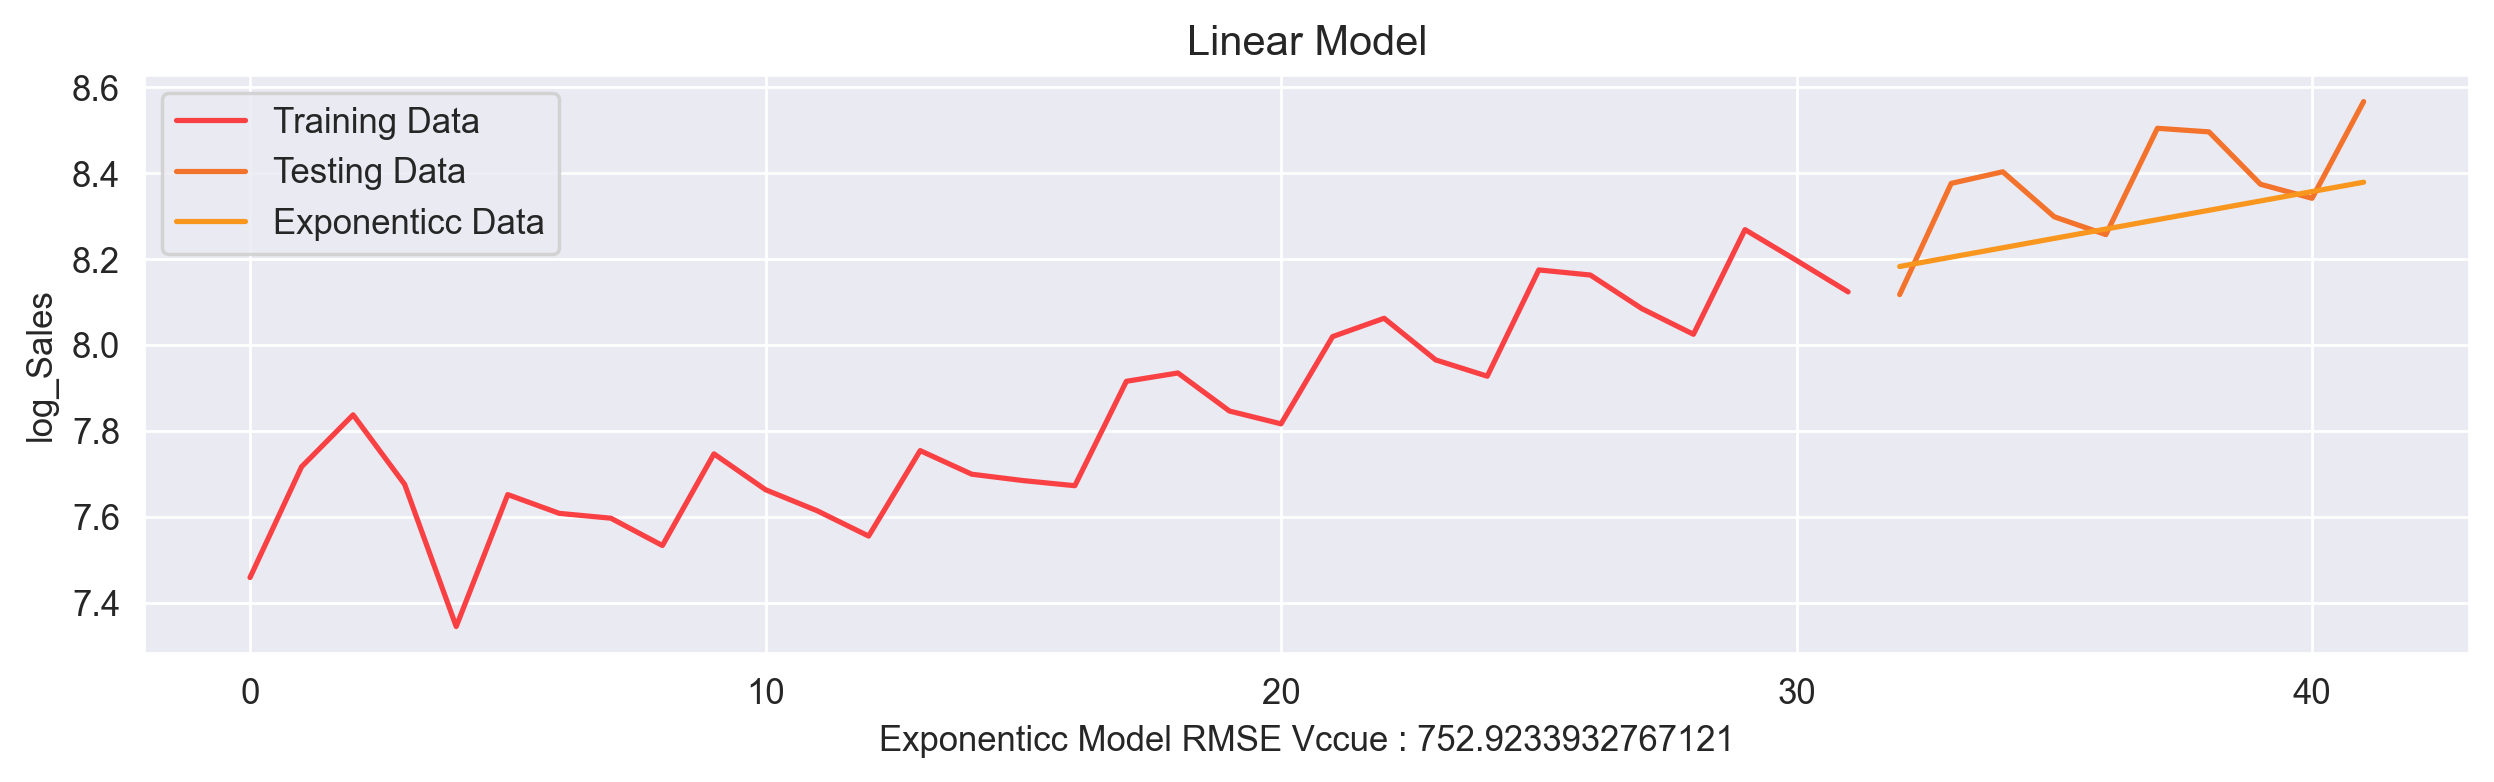

In [29]:
plt.title('Linear Model')
sns.lineplot(train['log_Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_exp, color = '#f8961e', label = 'Exponenticc Data')
plt.xlabel('Exponenticc Model RMSE Vccue : ' + str(rmse_exp))

### Creating Quadratic Model

In [30]:
Quad = smf.ols('Sales~t+squared_t',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","squared_t"]]))
rmse_Quad = np.sqrt(mean_squared_error(test['Sales'], pred_Quad))

#### Evccuating The Model

Text(0.5, 0, 'Quadratic Model RMSE Vccue : 457.73573554073874')

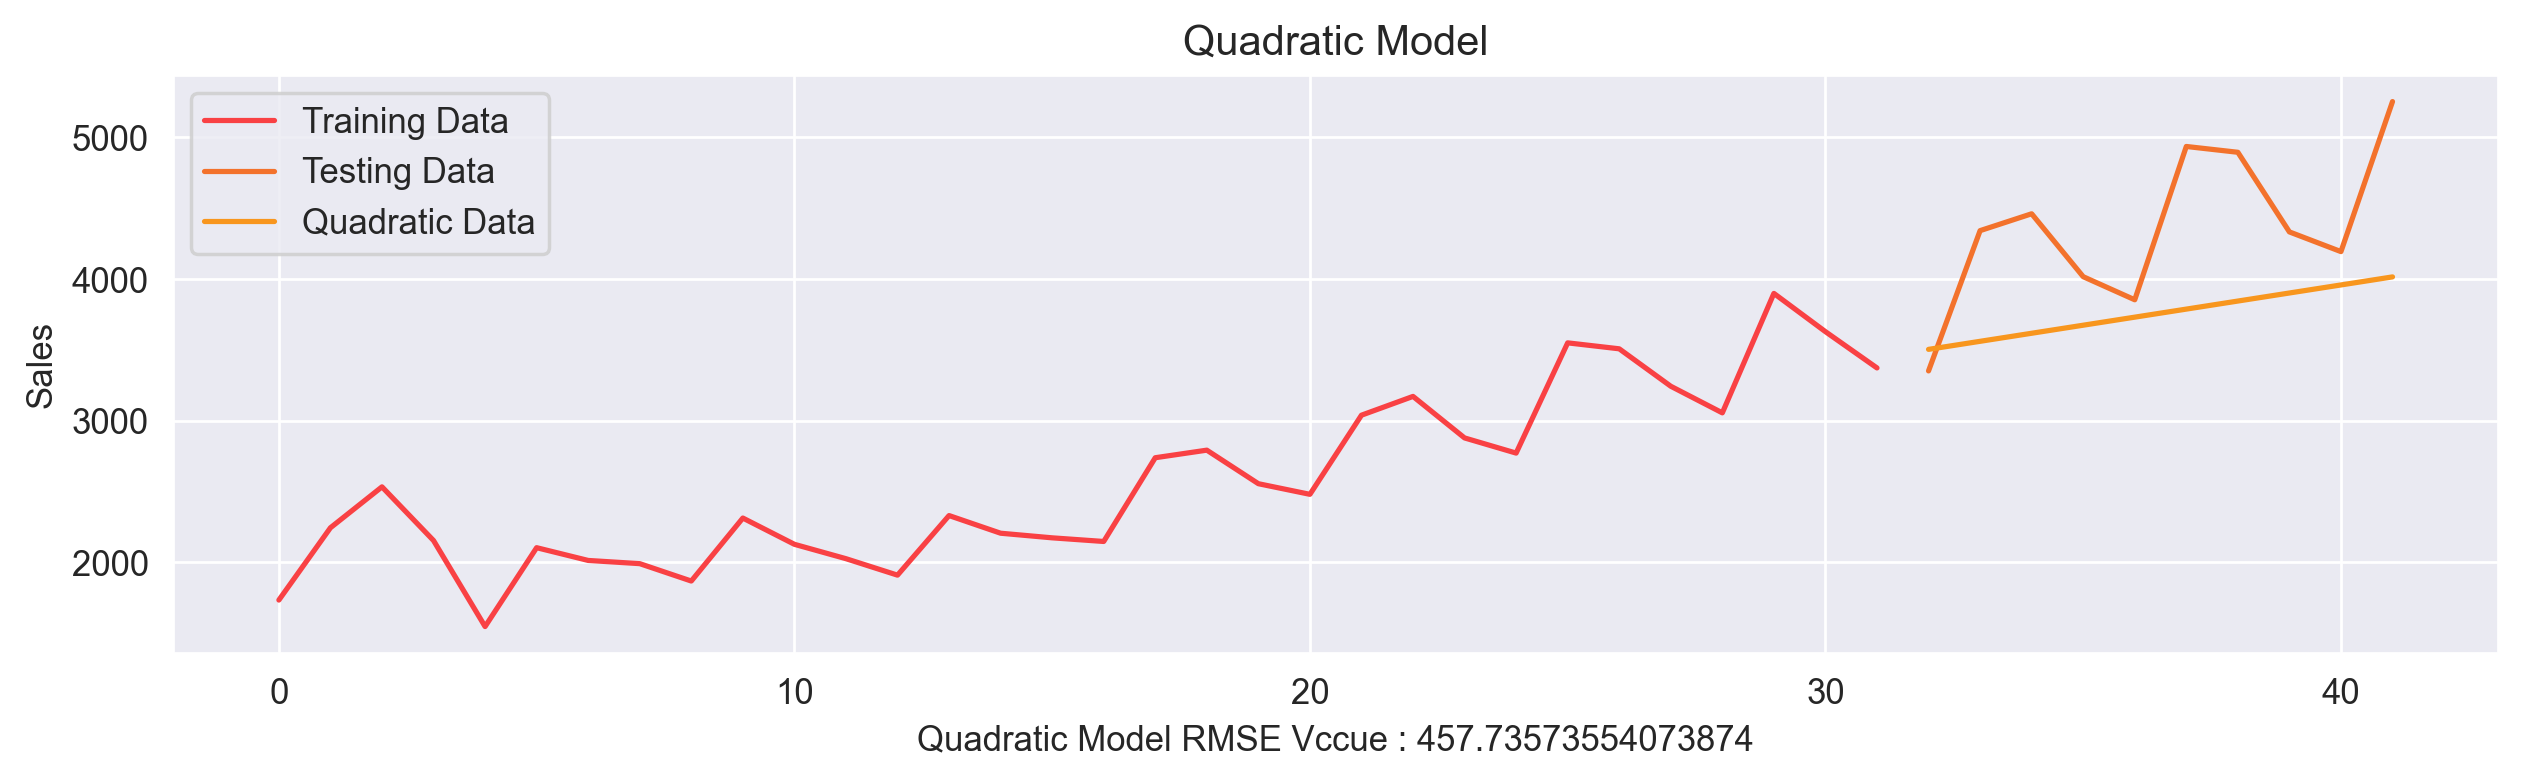

In [31]:
plt.title('Quadratic Model')
sns.lineplot(train['Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_linear, color = '#f8961e', label = 'Quadratic Data')
plt.xlabel('Quadratic Model RMSE Vccue : ' + str(rmse_Quad))

### Creating Additive Seasonccity Model

In [32]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea))

#### Evccuating The Model

Text(0.5, 0, 'Additive Seasonccity RMSE Vccue : 1850.4665461858358')

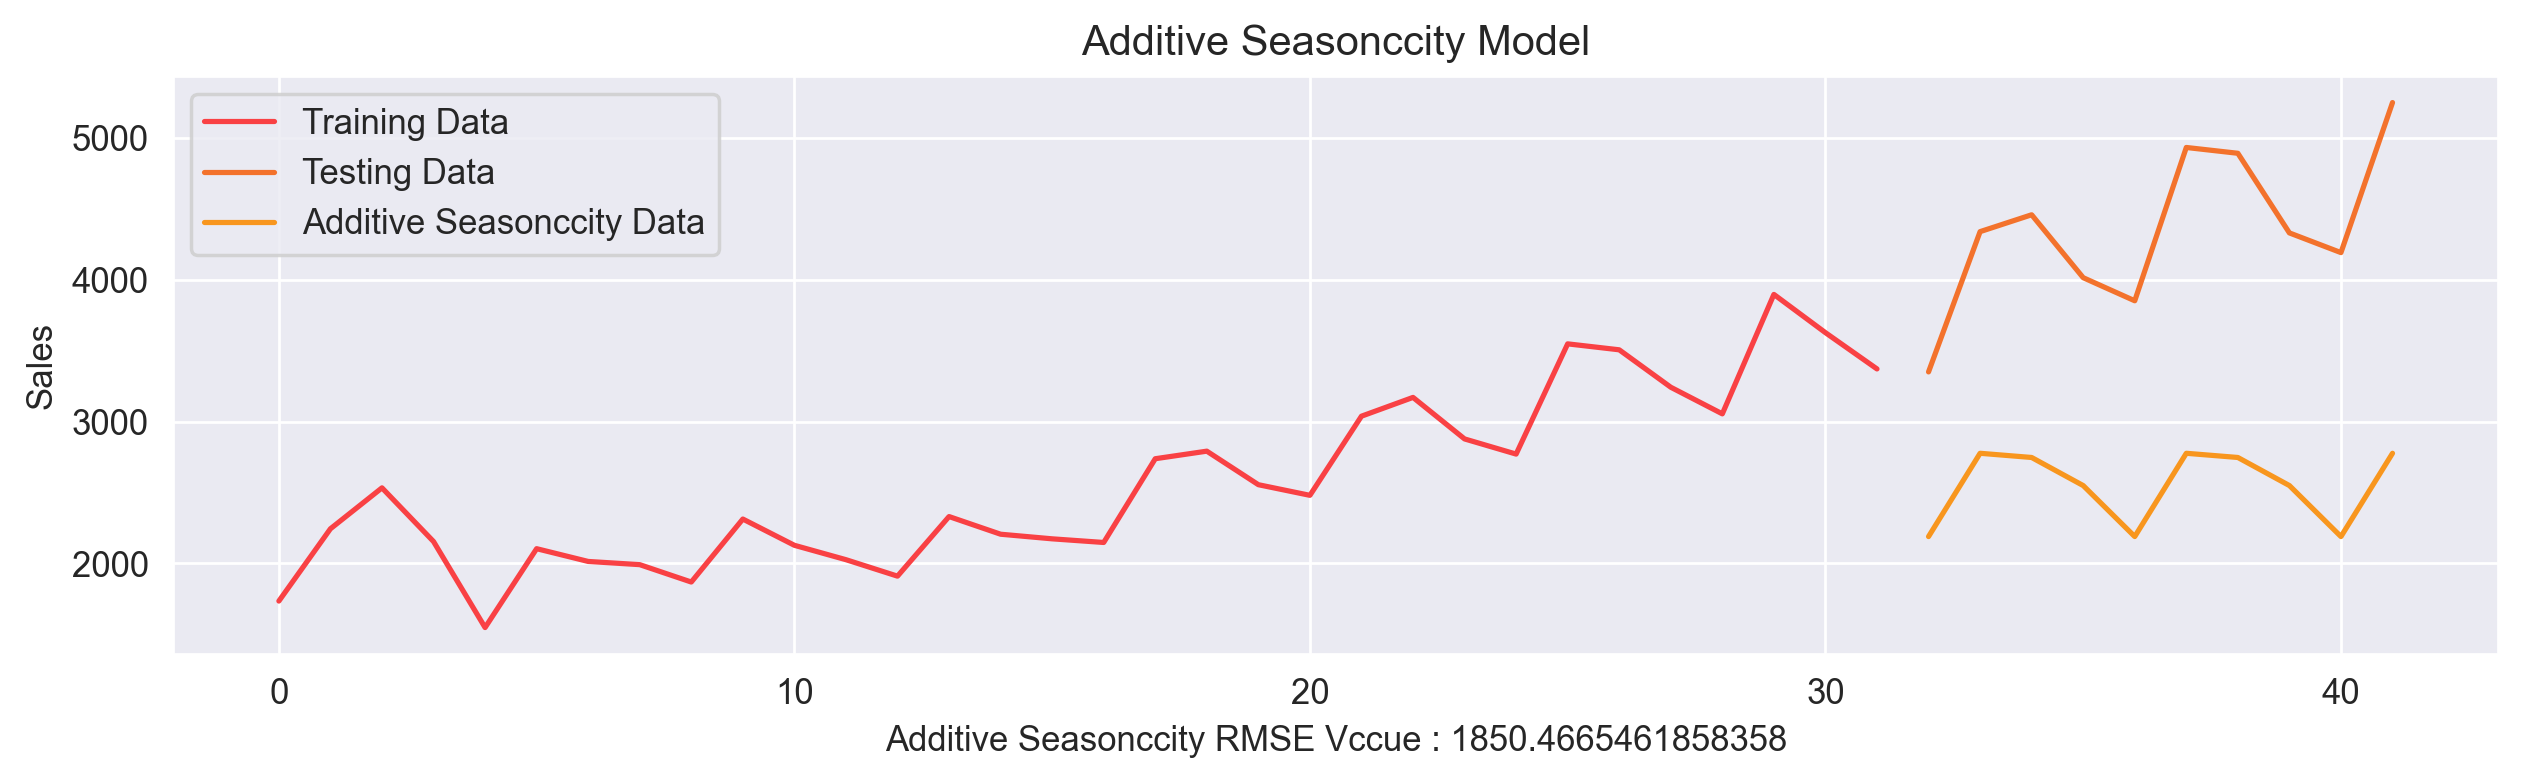

In [33]:
plt.title('Additive Seasonccity Model')
sns.lineplot(train['Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_add_sea, color = '#f8961e', label = 'Additive Seasonccity Data')
plt.xlabel('Additive Seasonccity RMSE Vccue : ' + str(rmse_add_sea))

### Creating Additive Seasonccity Quadratic  Model

In [34]:
add_sea_Quad = smf.ols('Sales~t+squared_t+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1', 'Q2', 'Q3', 'Q4', 't', 'squared_t']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea_quad))

#### Evccuating The Model

Text(0.5, 0, 'Additive Seasonccity Quadratic Model RMSE Vccue : 277.35107711285264')

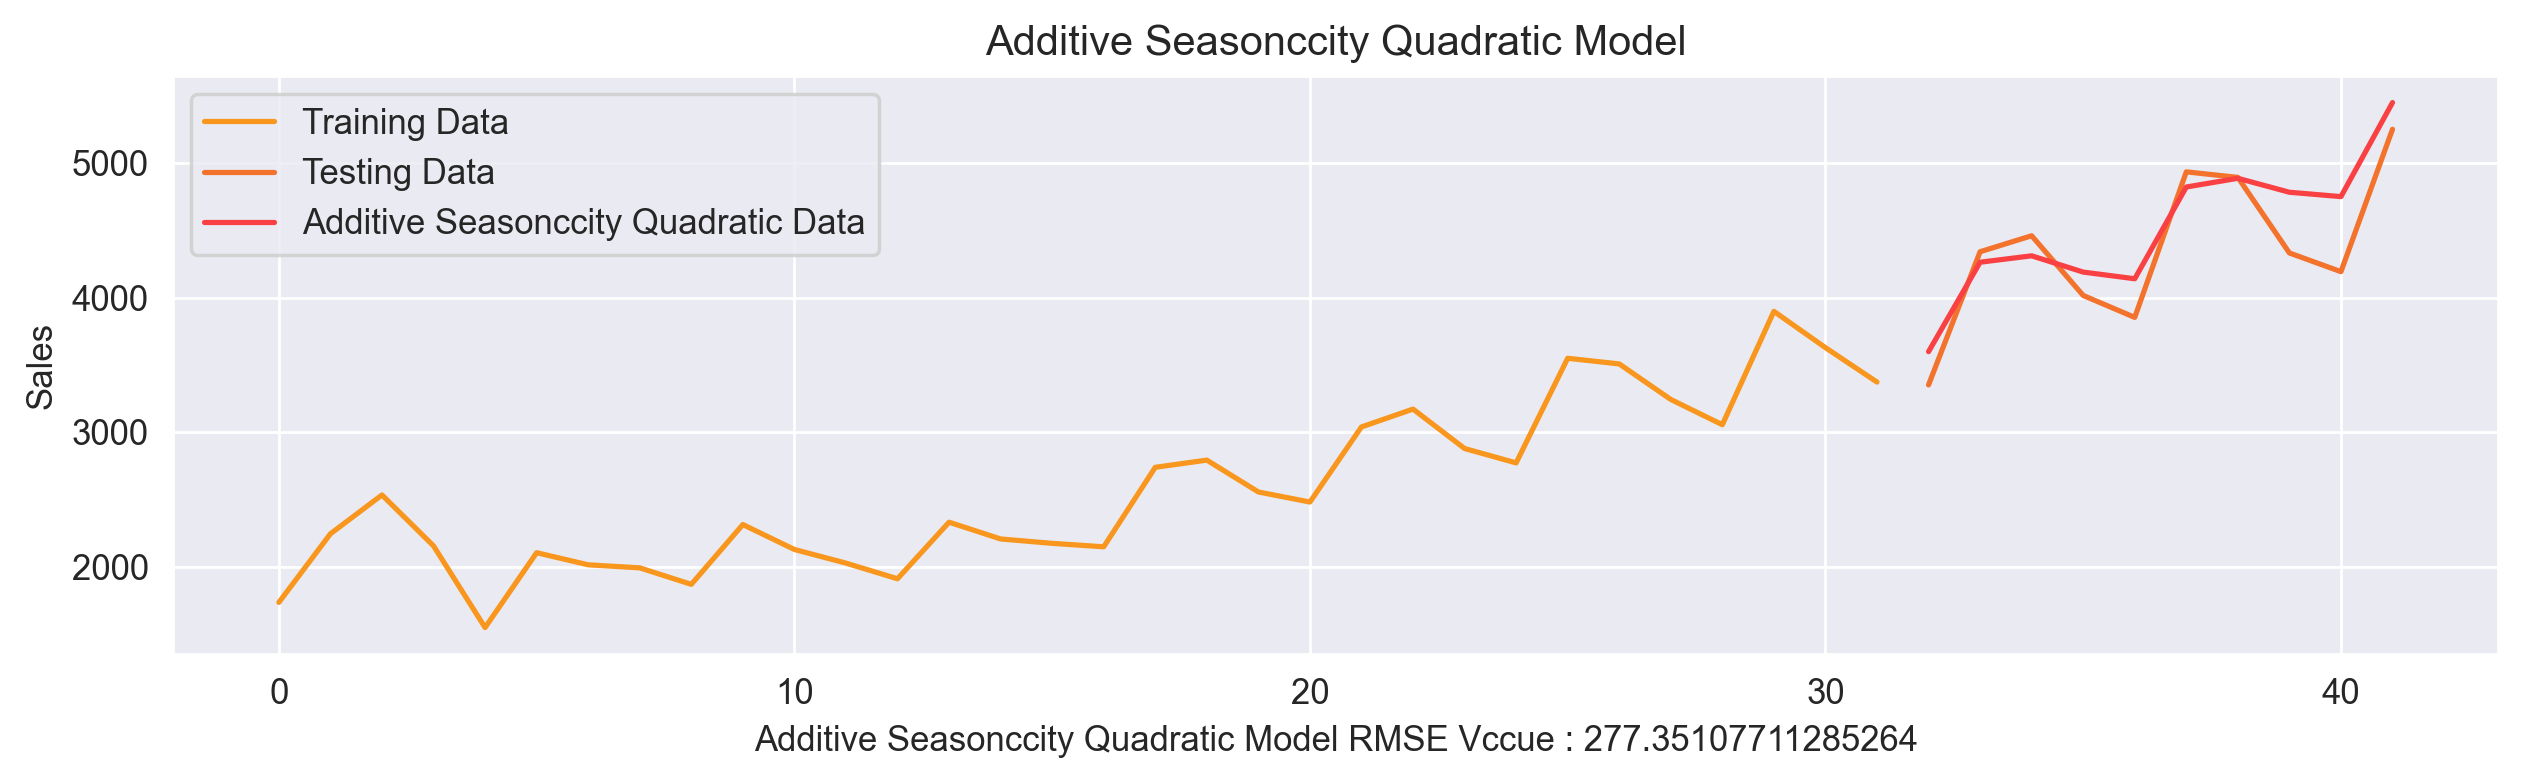

In [35]:
plt.title('Additive Seasonccity Quadratic Model')
sns.lineplot(train['Sales'], color = '#f8961e', label = 'Training Data')
sns.lineplot(test['Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_add_sea_quad, color = '#f94144', label = 'Additive Seasonccity Quadratic Data')
plt.xlabel('Additive Seasonccity Quadratic Model RMSE Vccue : ' + str(rmse_add_sea_quad))

### Creating Multiplicative Seasonccity Model

In [36]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(mean_squared_error(test['Sales'], pred_Mult_sea))

#### Evccuating The Model

Text(0.5, 0, 'Multiplicative Seasonccity Model RMSE Vccue : 4388.397233580229')

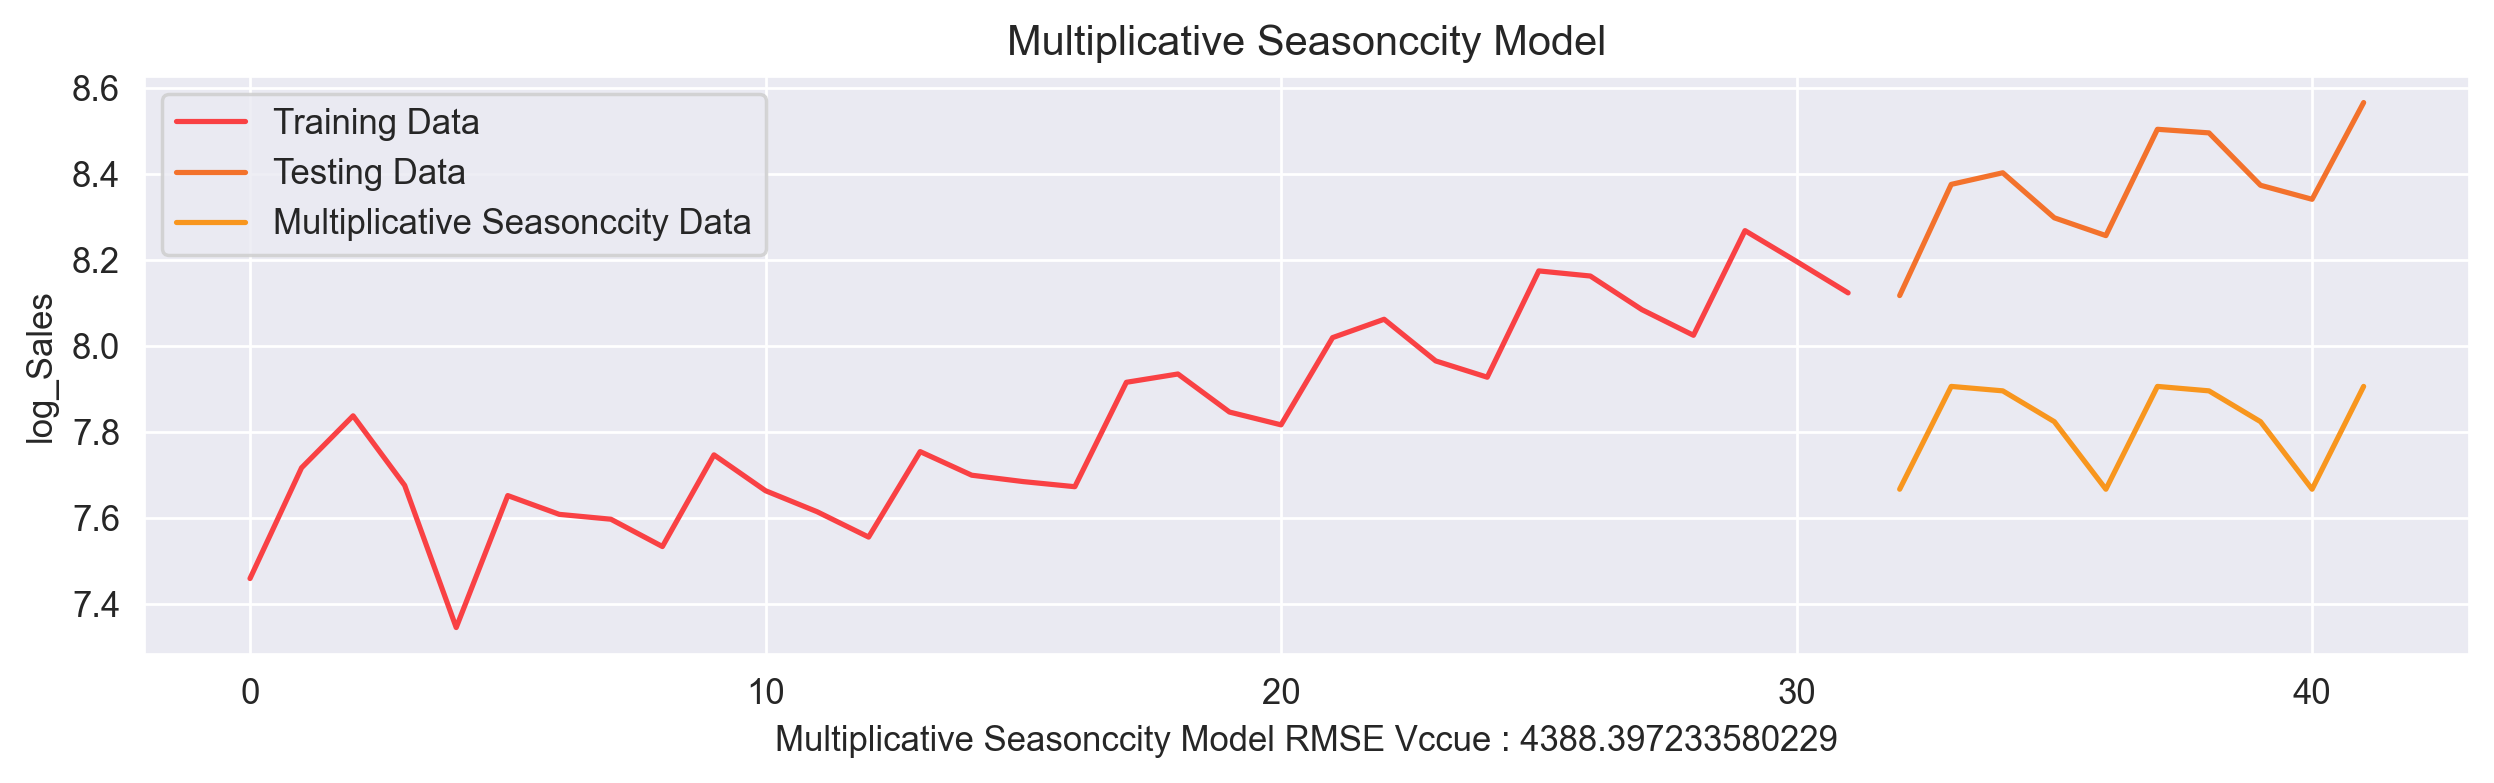

In [37]:
plt.title('Multiplicative Seasonccity Model')
sns.lineplot(train['log_Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_Mult_sea, color = '#f8961e', label = 'Multiplicative Seasonccity Data')
plt.xlabel('Multiplicative Seasonccity Model RMSE Vccue : ' + str(rmse_Mult_sea))

### Creating Multiplicative addditive seasonccity Model

In [38]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_Mult_add_sea))

#### Evccuating The Model

Text(0.5, 0, 'Multiplicative addditive seasonccity Model RMSE Vccue : 4387.942187885532')

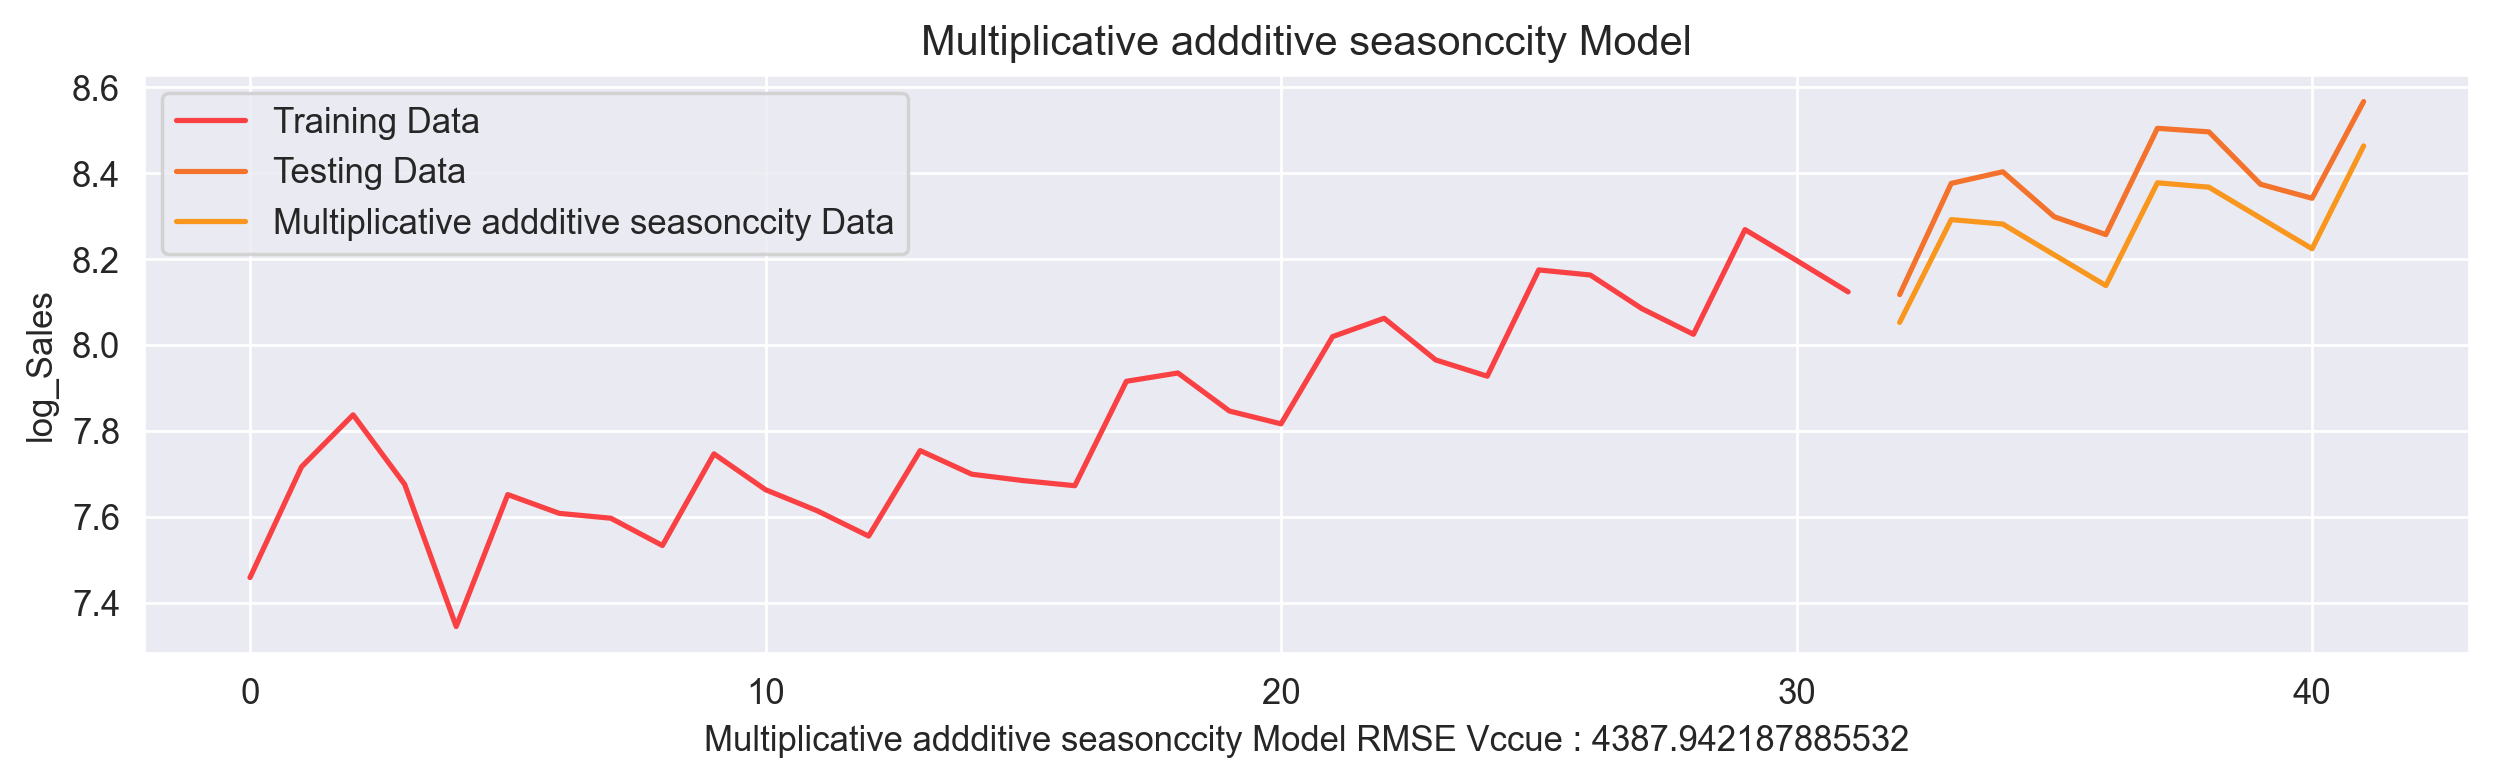

In [39]:
plt.title('Multiplicative addditive seasonccity Model')
sns.lineplot(train['log_Sales'], color = '#f94144', label = 'Training Data')
sns.lineplot(test['log_Sales'], color = '#f3722c', label = 'Testing Data')
sns.lineplot(pred_Mult_add_sea, color = '#f8961e', label = 'Multiplicative addditive seasonccity Data')
plt.xlabel('Multiplicative addditive seasonccity Model RMSE Vccue : ' + str(rmse_Mult_add_sea))

### Comparing All Model

In [40]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)

#### Ploting Bar-Plot

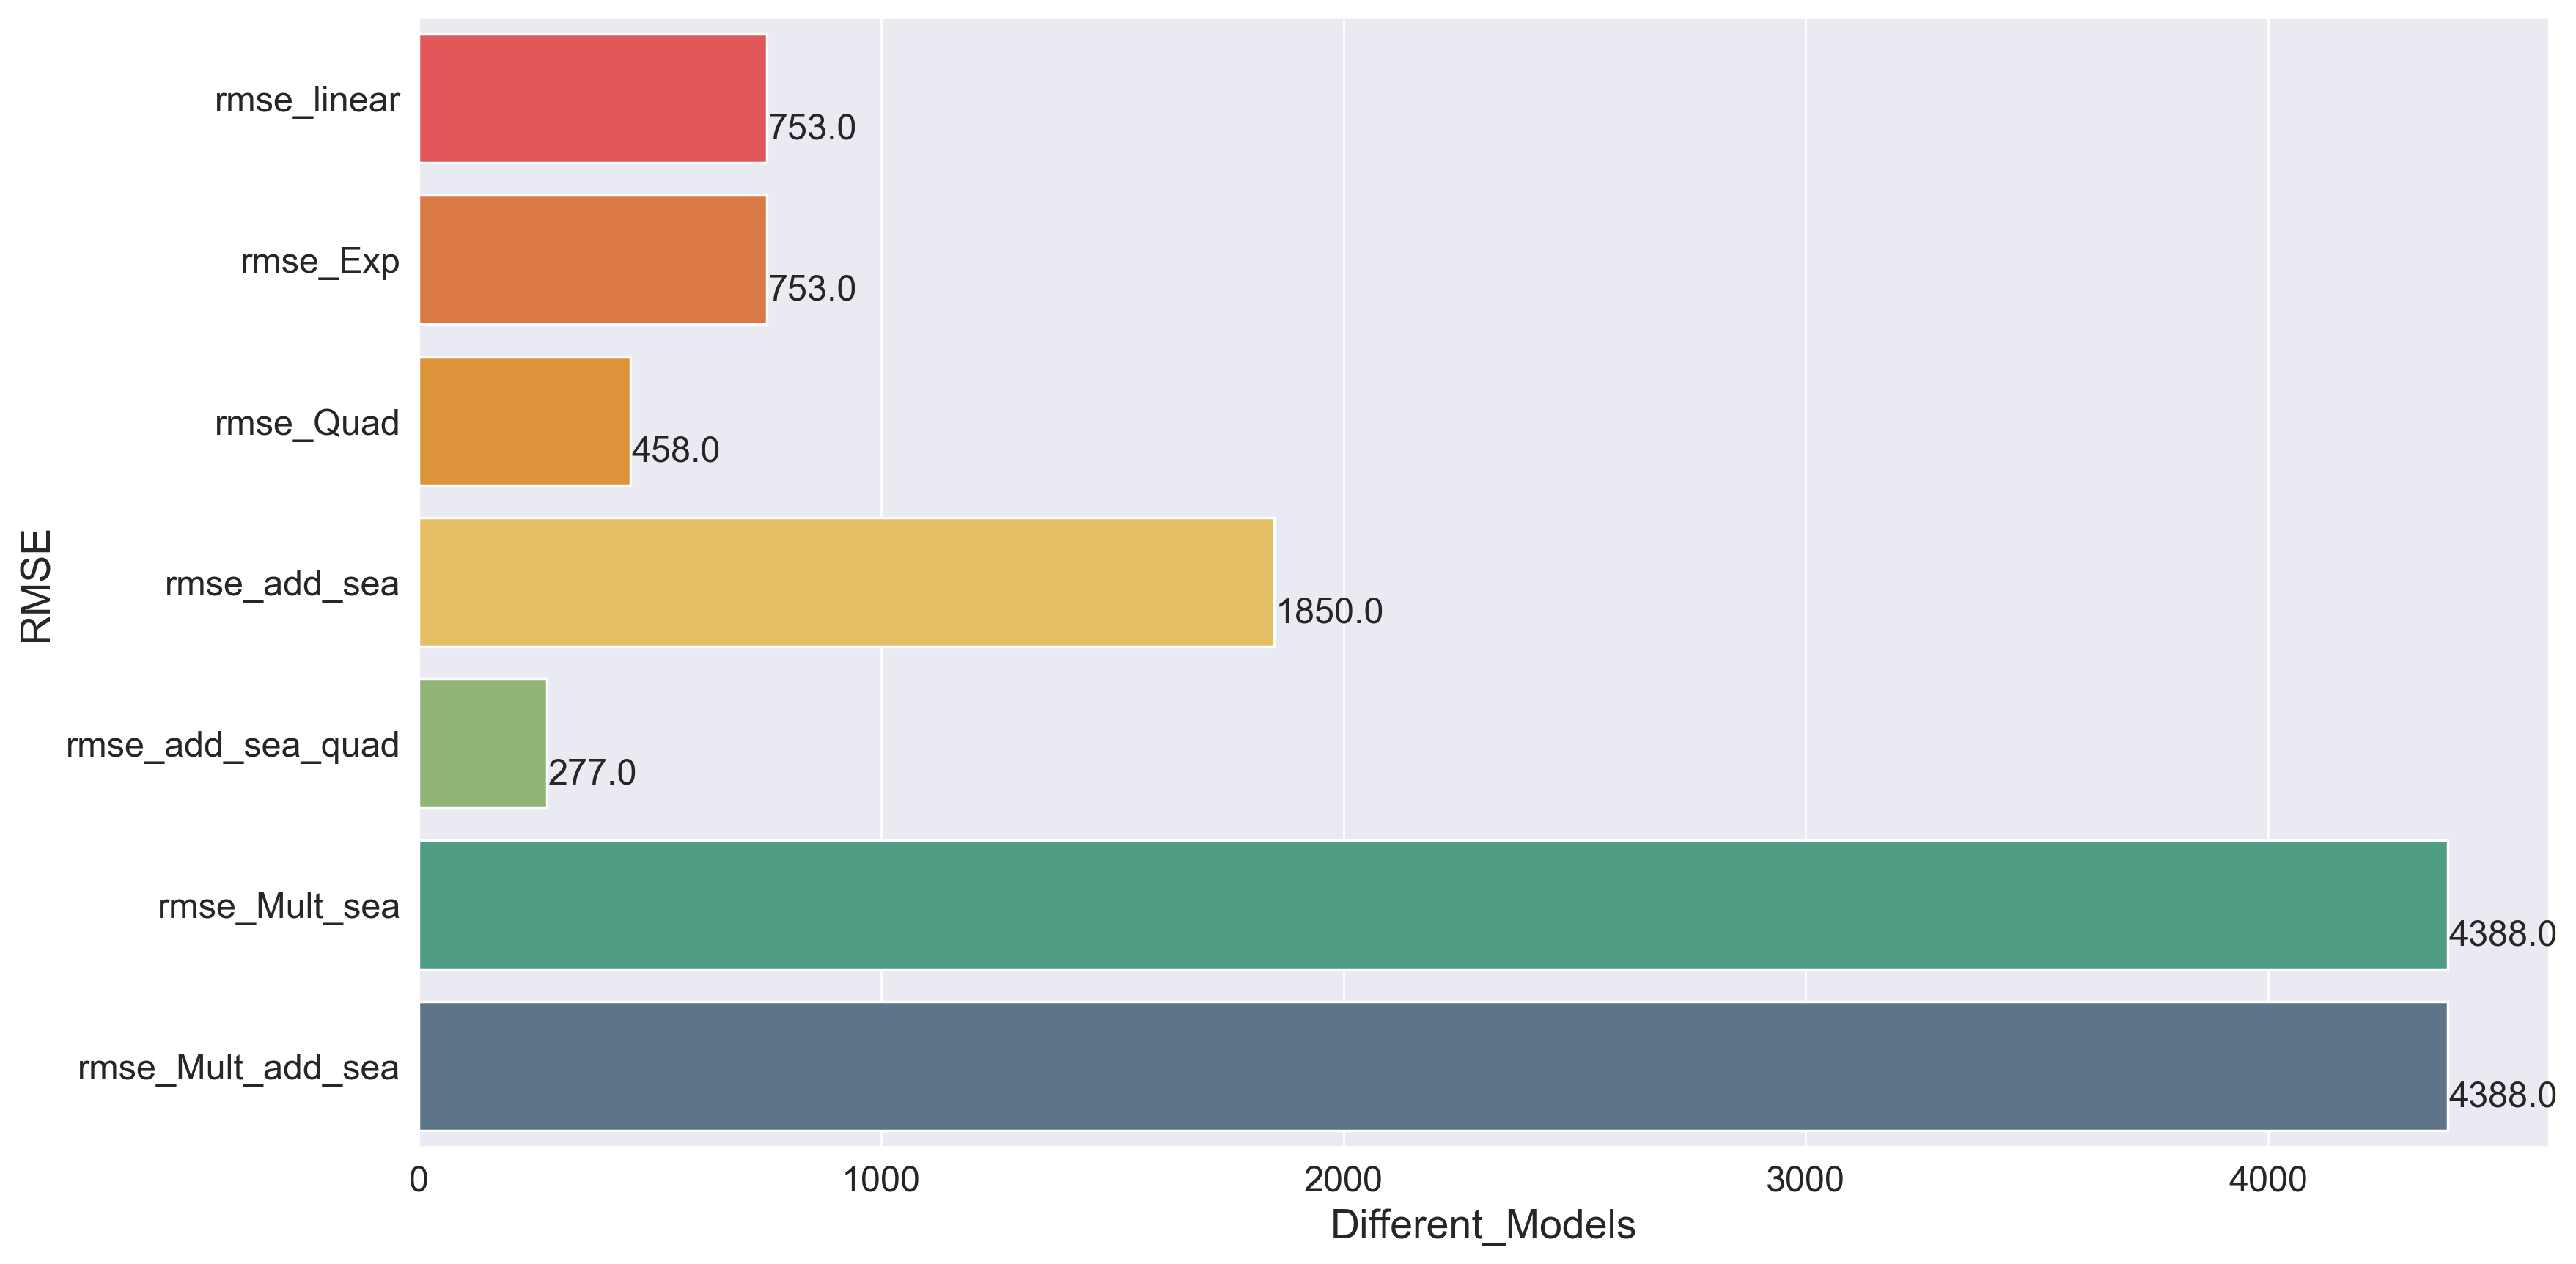

In [41]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.barplot(x = 'RMSE_Values', y = 'MODEL', data = table_rmse, palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590'], ax = ax)
ax.set_xlabel('Different_Models', size=16)
ax.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    ax.text(v + 3, i + .25, str(v), fontsize= 14)